---
# Imports
---

## Libraries
---

In [1]:
library(tidyverse)
library(strengejacke)

#library(Hmisc) # cut2

library(lme4)
library(lmerTest)


# Load helper functions
# library(devtools)
# source_url("https://raw.githubusercontent.com/hauselin/hausekeep/master/R/summaryh.R")

## set universal plot size:
options(repr.plot.width=7, repr.plot.height=3.5)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: tools
Loading sj!-packages: ggeffects
Loading sj!-packages: sjlabelled
Loading sj!-packages: sjmisc
Loading sj!-packages: sjstats
Loading sj!-packages: sjPlot
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



---
## Data
---

### Load
---
Already Cleaned

**++ADD cleaning parameters** to `ma_clean_data` file

---

In [3]:
load("data/swap_v1_clean.RData")
load("data/swap_v2_clean.RData")

# rename for simplicity
v1 = swap_v1_clean
v2 = swap_v2_clean
# clean up
rm(swap_v1_clean, swap_v2_clean)

v301_long = readRDS("data/v301_clean.rds")
v302_long = readRDS("data/v302_clean.rds")
v310_long = readRDS("data/v310_clean.rds")


In [4]:
# additional versions for two v310 conditions
v310_long_notp = filter(v310_long, condition=='no_tp')
v310_long_tp = filter(v310_long, condition=='tp')

In [5]:
v301 = v301_long[!duplicated(v301_long[,c("subject","trial")]),]
v302 = v302_long[!duplicated(v302_long[,c("subject","trial")]),]
v310 = v310_long[!duplicated(v310_long[,c("subject","trial")]),]

In [6]:
# indicate which version the experiment is
v1$version = 'v1'
v2$version = 'v2'
v301$version = 'v301'
v302$version = 'v302'
v310$version = 'v310'

In [7]:
print("v1")
head(v1, 3)
print("v2")
head(v2, 3)
print("v3.0.1")
head(v301,3)
print("v3.0.2")
head(v302, 3)

[1] "v1"


Trial correct faceVal houseVal mult1House mult2Face summedVal earnings
1 1     1       0.66     0.86    2          2          3.04     39.60   
2 2     0       0.38    -0.52    1          1         -0.14     39.46   
3 3     1       0.32    -0.68    1          3          0.28     39.74   
  imageList          flip ⋯ 5_fixation 6_fixation 7_fixation 8_fixation
1 [1, 0, 1, 0, 1, 0] 2    ⋯ 1.233326   2.699835   NA         NA        
2 [0, 1, 0]          2    ⋯       NA         NA   NA         NA        
3 [0, 1, 0]          1    ⋯       NA         NA   NA         NA        
  9_fixation 10_fixation 11_fixation 12_fixation 13_fixation version
1 NA         NA          NA          NA          NA          v1     
2 NA         NA          NA          NA          NA          v1     
3 NA         NA          NA          NA          NA          v1

[1] "v2"


choice correct earnings face_mult face_val_base first_image house_mult
10 0      1       -10.600  2.0       -0.38         1           0.5       
11 1      1       -10.306  0.5        0.50         0           0.1       
13 0      1       -10.646  1.0       -0.40         0           1.0       
   house_val_base image_list   key_entry_list                   ⋯ swapAmount
10 -0.72          [1, 0, 1]    ['space', 'space', 'j']          ⋯ 3         
11  0.44          [0, 1]       ['space', 'f']                   ⋯ 2         
13 -0.78          [0, 1, 0, 1] ['space', 'space', 'space', 'j'] ⋯ 4         
   firstMult firstVal secondMult secondVal faceTotal houseTotal total_0_face
10 0.5       -0.36    2.0        -0.760    -0.76     -0.360     1.6668216   
11 0.5        0.25    0.1         0.044     0.25      0.044     0.9669452   
13 1.0       -0.40    1.0        -0.780    -0.40     -0.780     0.9169345   
   total_1_house version
10 4.616794      v2     
11 2.850013      v2     
13 2.099861      v2

[1] "v3.0.1"


date             psychopy_version exp_version face_version house_version left
1 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
2 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
3 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
  subject block trial rt    ⋯ fix_stim_val_base fix_stim_mult left_mult
1 1       0     1     1.933 ⋯ 0                 0             10       
2 1       0     3     1.933 ⋯ 0                 0              2       
3 1       0     4     1.550 ⋯ 0                 0             10       
  right_mult left_mult_pull outlier_accuracy_pVal outlier_accuracy_MAD
1 3          7              0.274129              0.76                
2 2          0              0.274129              0.76                
3 3          7              0.274129              0.76                
  outlier_rt_pVal outlier_rt_MAD version
1 0               1.93           v301   
2 0               1.93           v301   
3 0               1.55           v301

[1] "v3.0.2"


date             psychopy_version exp_version face_version house_version left
1 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
2 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
3 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
  subject block trial rt    ⋯ fix_stim_val_base fix_stim_mult left_mult
1 41      0     0     3.467 ⋯ 0                 0             0.5      
2 41      0     1     2.050 ⋯ 0                 0             2.0      
3 41      0     2     3.867 ⋯ 0                 0             1.0      
  right_mult left_mult_pull outlier_accuracy_pVal outlier_accuracy_MAD
1 0.5        0.0            0.4746895             0.85                
2 0.5        1.5            0.4746895             0.85                
3 1.0        0.0            0.4746895             0.85                
  outlier_rt_pVal outlier_rt_MAD version
1 0               3.47           v302   
2 0               2.05           v302   
3 0               3.87           v302

---
### Format
---

In [8]:
# Bin responses by summed val
v1$bin = Hmisc::cut2(v1$summedVal, g=19, levels.mean=TRUE, digits=2)
v2$bin = Hmisc::cut2(v2$summedVal, g=19, levels.mean=TRUE, digits=2)
v301$bin = Hmisc::cut2(v301$summed_val_total, g=19, levels.mean=TRUE, digits=2)
v302$bin = Hmisc::cut2(v302$summed_val_total, g=19, levels.mean=TRUE, digits=2)
v310$bin = Hmisc::cut2(v310$summed_val_total, g=19, levels.mean=TRUE, digits=2)

# Bin responses by abs val
v1$bin_abs = Hmisc::cut2(abs(v1$summedVal), g=10, levels.mean=TRUE, digits=2)
v2$bin_abs = Hmisc::cut2(abs(v2$summedVal), g=10, levels.mean=TRUE, digits=2)
v301$bin_abs = Hmisc::cut2(abs(v301$summed_val_total), g=10, levels.mean=TRUE, digits=2)
v302$bin_abs = Hmisc::cut2(abs(v302$summed_val_total), g=10, levels.mean=TRUE, digits=2)
v310$bin_abs = Hmisc::cut2(abs(v310$summed_val_total), g=10, levels.mean=TRUE, digits=2)

In [9]:
# subdivide 310 into tp and no tp
v310_notp = filter(v310, condition=='no_tp')
v310_tp = filter(v310, condition=='tp')

v310_notp$version = 'v310_notp'
v310_tp$version = 'v310_tp'

---
# Psychometrics
---

## RT

by Abs. Offer Value

---

### Function
---

In [10]:
rt_func = function(df){
    subjects = length(unique(df$subject))

    rt = df %>%
        group_by(subject, bin_abs) %>%
        summarise(rt = mean(rt)) %>%
        group_by(bin_abs) %>%
        summarise(N = length(rt),
                  rt_se = sd(rt) / sqrt(subjects),
                  rt = mean(rt)
                 ) %>%
        mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

    #head(rt, 3)
    ggplot(data = rt, aes(x = bin_abs,y = rt)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = rt-rt_se,ymax = rt+rt_se)) + 
      labs(x = "Net Value", y = "Reaction Time (seconds)") +
      theme_minimal() +
      ggtitle("Mean Reaction Time by abs(Net Value)")
    #return(rt)
}

---
### V1
---

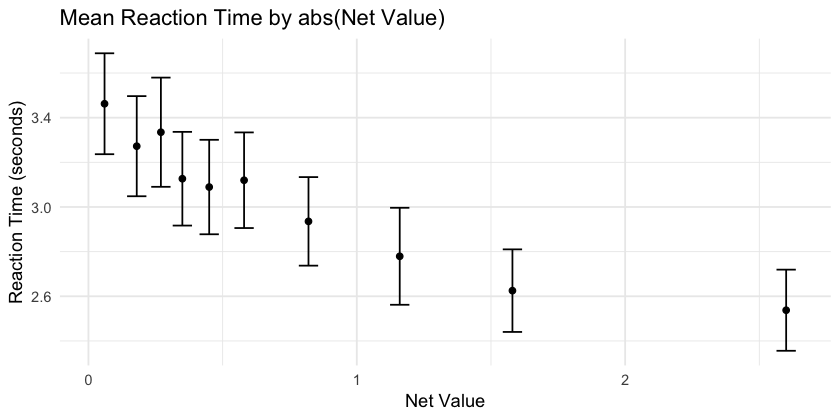

In [11]:
rt_func(v1)

---
### V2
---

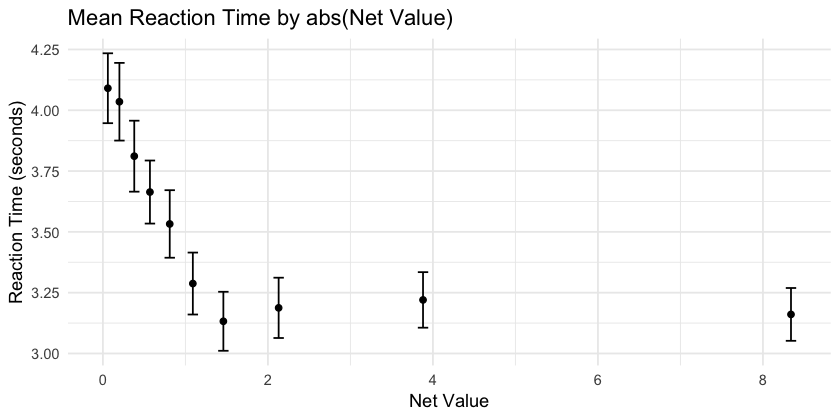

In [11]:
rt_func(v2)

---
### V3.0.1
---

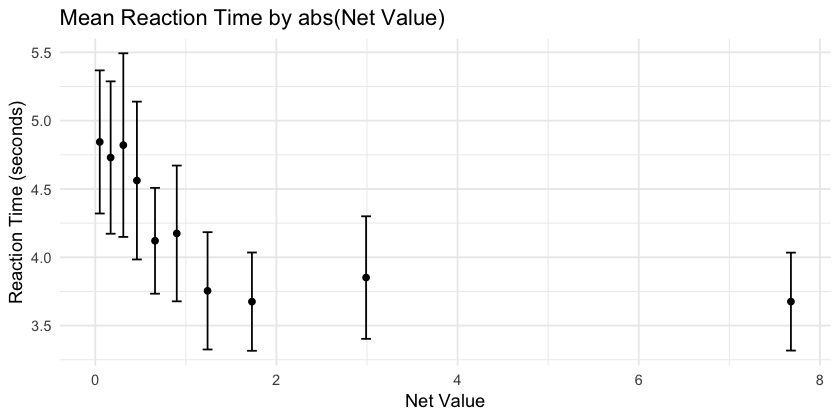

In [74]:
rt_func(v301)

---
### V3.0.2
---

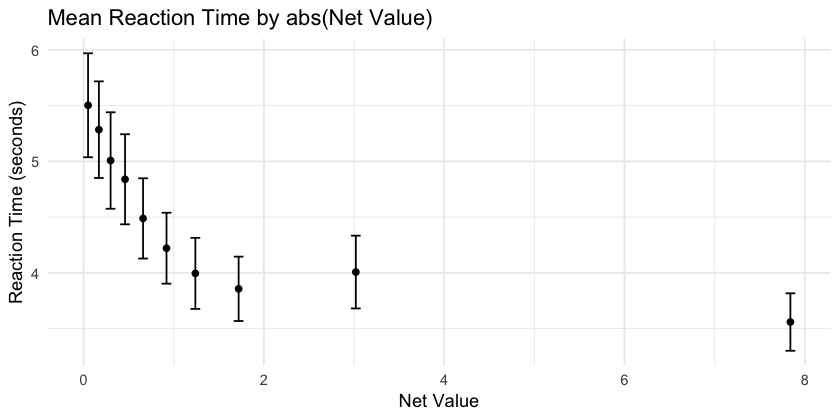

In [13]:
rt_func(v302)

---
### V3.1.0
---

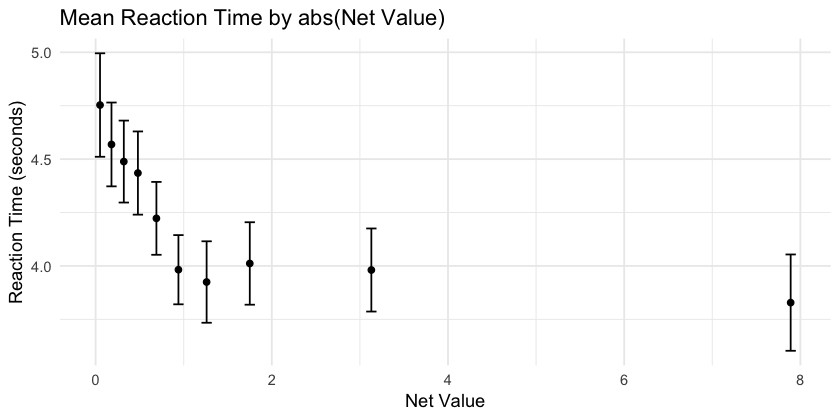

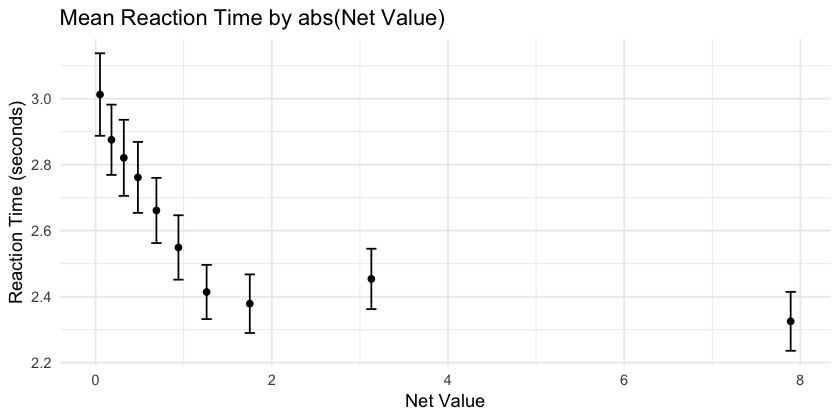

In [28]:
rt_func(v310_notp)
rt_func(v310_tp)

---
### Comparisons
---

In [34]:
# clean up
rm(df_all)

In [35]:
# list of dfs we want tocompare
df.list = list(v1, v2, v301, v302, v310_notp, v310_tp)

In [36]:
# make df with all versions
for (df in df.list){
    subjects = length(unique(df$subject))
    version = df$version[1]

    temp = df %>%
            group_by(subject, bin_abs) %>%
            summarise(rt = mean(rt)) %>%
            group_by(bin_abs) %>%
            summarise(N = length(rt),
                      rt_se = sd(rt) / sqrt(subjects),
                      rt = mean(rt)
                     ) %>%
            mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2),
                  version = version)
    
    if(!exists("df_all")){
        df_all = temp
    }
    else{
        df_all = rbind(df_all, temp)
    }
}

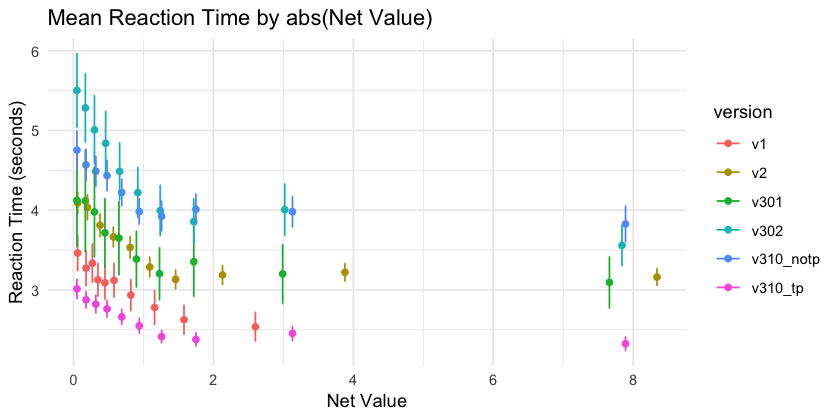

In [37]:
# plot
ggplot(data = df_all,aes(x = bin_abs,y = rt, colour=version)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = rt-rt_se,ymax = rt+rt_se)) + 
      labs(x = "Net Value", y = "Reaction Time (seconds)") +
      theme_minimal() +
      ggtitle("Mean Reaction Time by abs(Net Value)")

---
## Fixations
by Abs. Offer Value

---

### Function
---

In [38]:
fix_func = function(df) {
    subjects = length(unique(df$subject))

    fix = df %>%
        group_by(subject, bin_abs) %>%
        summarise(swaps = mean(swapAmount)) %>%
        group_by(bin_abs) %>%
        summarise(N = length(swaps),
                  fix_se = sd(swaps) / sqrt(subjects),
                  fix_num = mean(swaps)
                 ) %>%
        mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2))

    #head(fix, 3)
    
    ggplot(data = fix,aes(x = bin_abs,y = fix_num)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = fix_num-fix_se,ymax = fix_num+fix_se)) + 
      labs(x = "Net Value", y = "Fixations (count)") +
      theme_minimal() +
      ggtitle("Mean Fixation Count by abs(Net Value)")
    
    #return(fix)
}

---
### V1
---

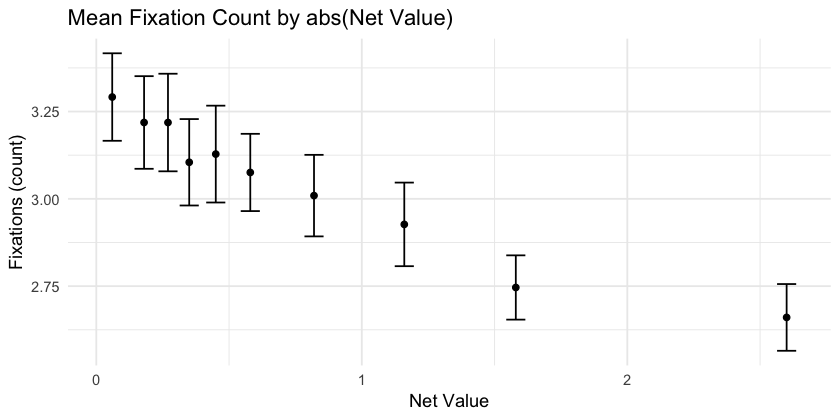

In [39]:
fix_func(v1)

### V2

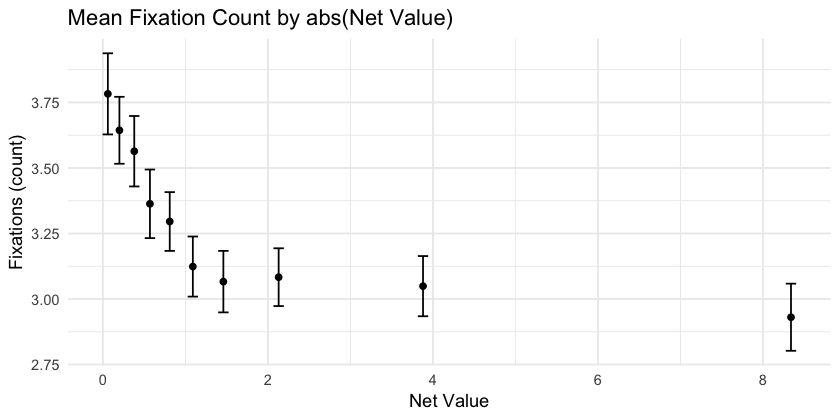

In [40]:
fix_func(v2)

---
### V3.0.1
---

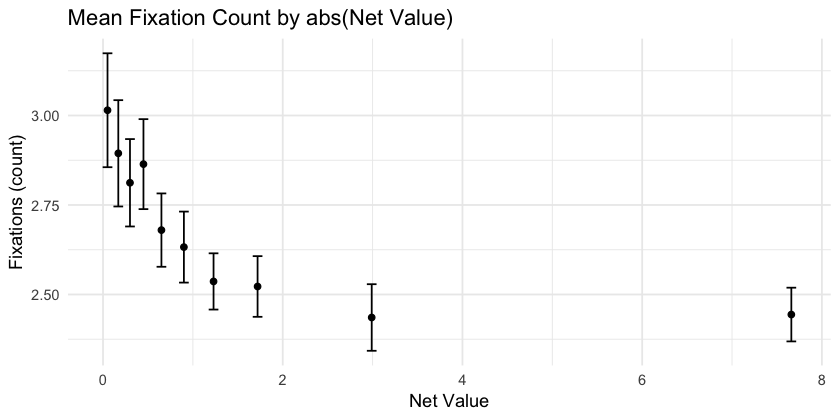

In [41]:
v301$swapAmount = v301$total_stim_fix
fix_func(v301)

---
### V3.0.2
---

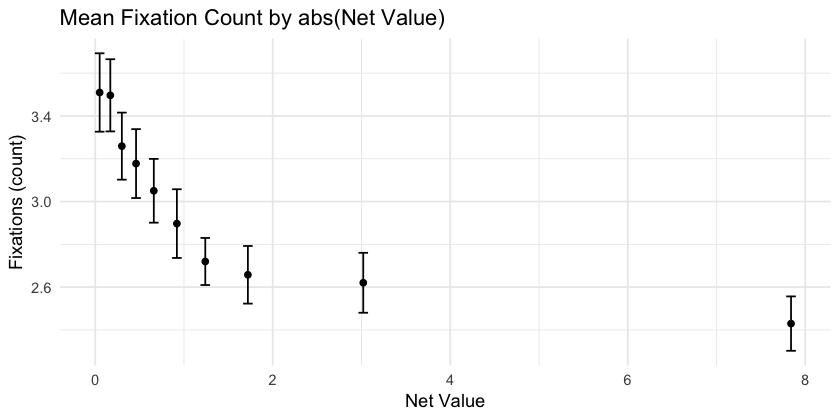

In [42]:
v302$swapAmount = v302$total_stim_fix
fix_func(v302)

---
### V3.1.0
---

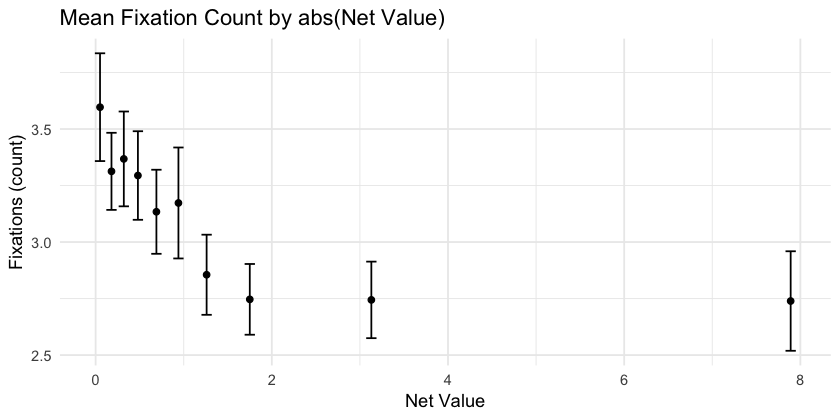

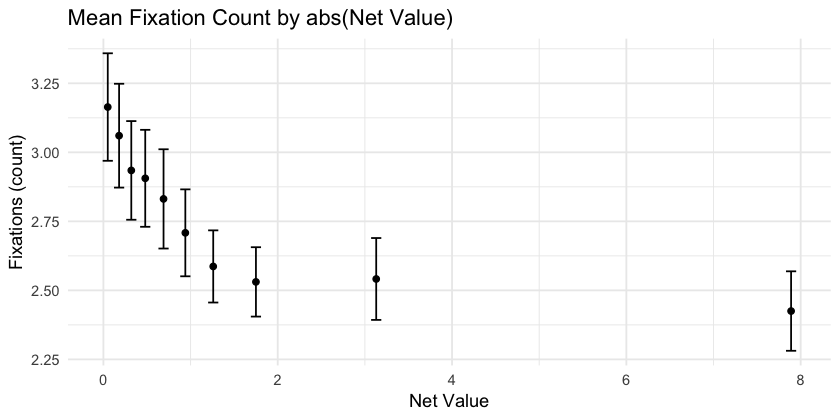

In [43]:
v310_notp$swapAmount = v310_notp$total_stim_fix
v310_tp$swapAmount = v310_tp$total_stim_fix

fix_func(v310_notp)
fix_func(v310_tp)

---
### Comparisons
---

In [44]:
# clean up
rm(df_all)

In [45]:
# list of dfs we want tocompare
df.list = list(v1, v2, v301, v302, v310_notp, v310_tp)

In [46]:
# make df with all versions
for (df in df.list){
    subjects = length(unique(df$subject))
    version = df$version[1]

    temp = df %>%
            group_by(subject, bin_abs) %>%
            summarise(swaps = mean(swapAmount)) %>%
            group_by(bin_abs) %>%
            summarise(N = length(swaps),
                      fix_se = sd(swaps) / sqrt(subjects),
                      fix_num = mean(swaps)
                     ) %>%
            mutate(bin_abs = round(as.numeric(as.character(bin_abs)), 2),
                  version = version)
    
    if(!exists("df_all")){
        df_all = temp
    }
    else{
        df_all = rbind(df_all, temp)
    }
}

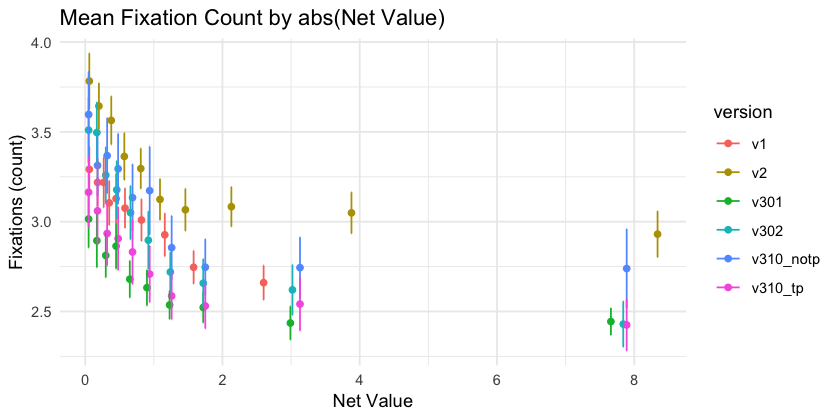

In [49]:
# plot
ggplot(data = df_all,aes(x = bin_abs,y = fix_num, colour=version)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = fix_num-fix_se,ymax = fix_num+fix_se)) + 
      labs(x = "Net Value", y = "Fixations (count)") +
      theme_minimal() +
      ggtitle("Mean Fixation Count by abs(Net Value)")

---
## P(Accept)
by Offer Value

---

### V1
---

In [56]:
accept_func = function(df){
    subjects = length(unique(df$subject))

    # p(accept)
    p_a = df %>%
        group_by(subject, bin) %>%
        summarise(accept = mean(choice)) %>%
        group_by(bin) %>%
        summarise(N = length(accept),
                  accept_se = sd(accept, na.rm=TRUE) / sqrt(subjects),
                  accept = mean(accept)
                 ) %>%
        mutate(bin = round(as.numeric(as.character(bin)), 2))

    #head(p_a, 3)
    ggplot(data = p_a,aes(x = bin,y = accept)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = accept-accept_se, ymax = accept+accept_se)) + 
      labs(x = "Net Value", y = "P (accept)") +
      theme_minimal() +
      ggtitle("Mean Fixation Count by abs(Net Value)")
    #return(p_a)
}


---
### V1
---

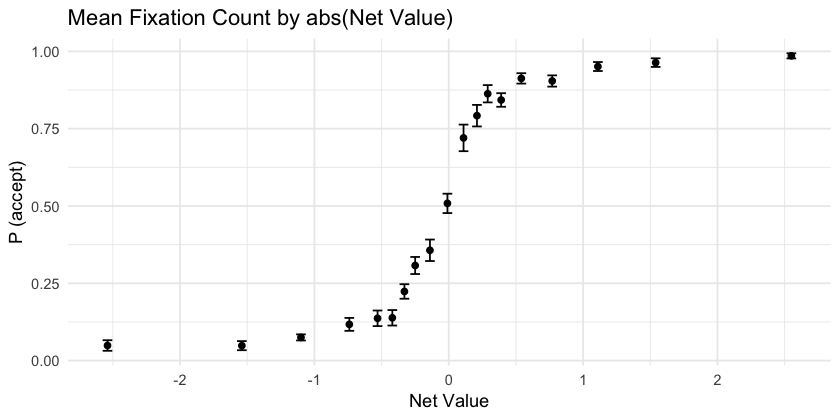

In [57]:
accept_func(v1)

---
### V2
---

Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

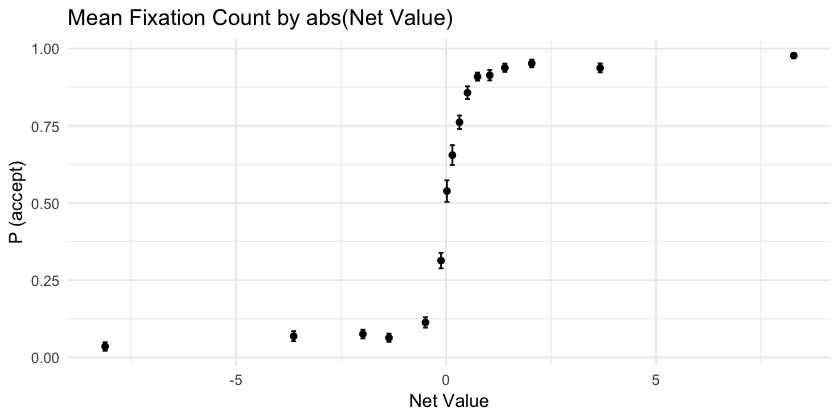

In [58]:
accept_func(v2)

---
### V3.0.1
---

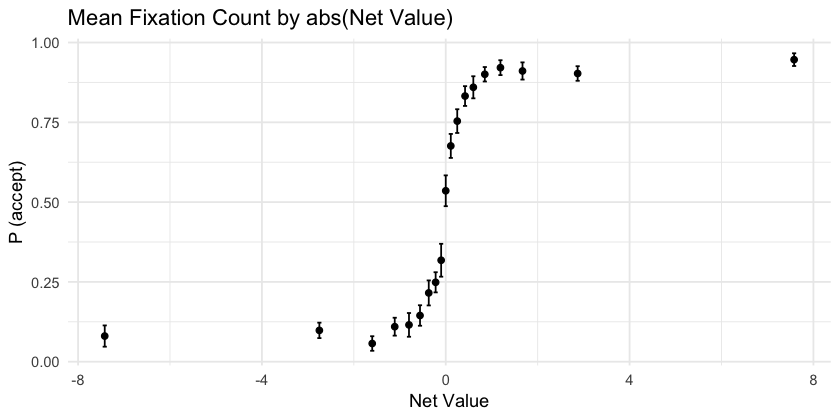

In [59]:
v301$choice = v301$response
accept_func(v301)

---
### V3.0.2
---

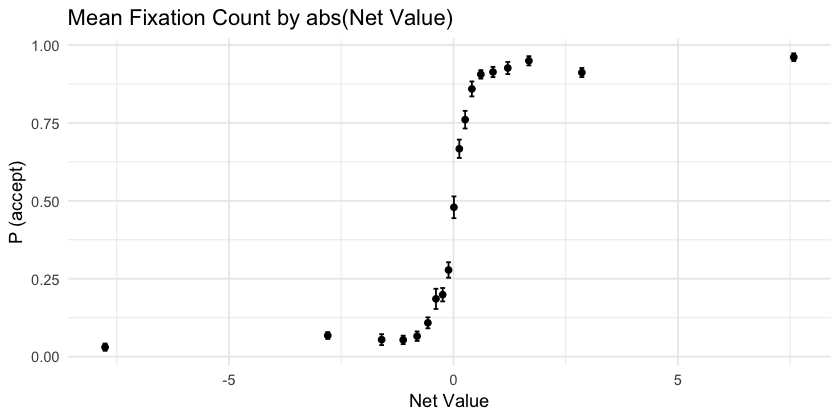

In [60]:
v302$choice = v302$response
accept_func(v302)

---
### V3.1.0
---

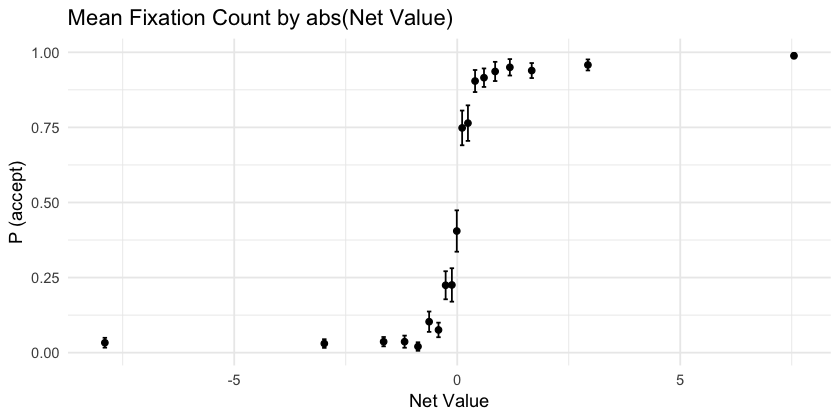

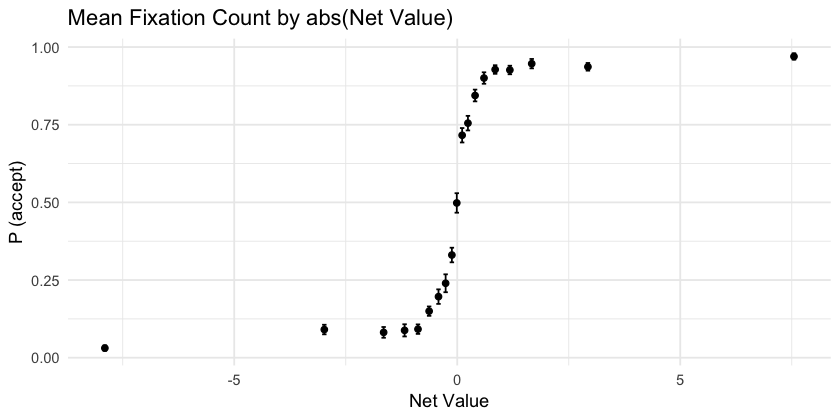

In [61]:
v310_notp$choice = v310_notp$response
v310_tp$choice = v310_tp$response

accept_func(v310_notp)
accept_func(v310_tp)

---
### Comparisons
---

In [63]:
# clean up
rm(df_all)

In [64]:
# list of dfs we want tocompare
df.list = list(v1, v2, v301, v302, v310_notp, v310_tp)

In [65]:
# make df with all versions
for (df in df.list){
    subjects = length(unique(df$subject))
    version = df$version[1]

    temp = df %>%
            group_by(subject, bin) %>%
            summarise(accept = mean(choice)) %>%
            group_by(bin) %>%
            summarise(N = length(accept),
                      accept_se = sd(accept, na.rm=TRUE) / sqrt(subjects),
                      accept = mean(accept)
                     ) %>%
            mutate(bin = round(as.numeric(as.character(bin)), 2),
                  version = version)
    
    if(!exists("df_all")){
        df_all = temp
    }
    else{
        df_all = rbind(df_all, temp)
    }
}

Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_errorbar).”

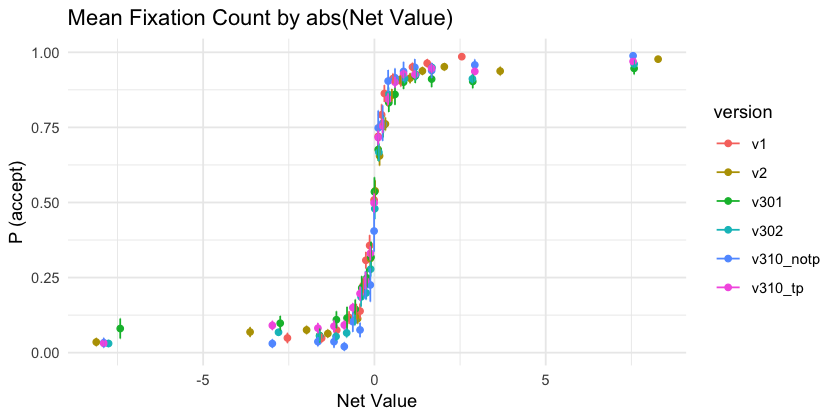

In [66]:
ggplot(data = df_all, aes(x = bin,y = accept, colour=version)) + 
      geom_point() + 
      #geom_line() +
      geom_errorbar(aes(ymin = accept-accept_se, ymax = accept+accept_se)) + 
      labs(x = "Net Value", y = "P (accept)") +
      theme_minimal() +
      ggtitle("Mean Fixation Count by abs(Net Value)")

---
# Performance
---

## By Version
---

In [254]:
mean(v1$correct)

[1] 0.8447779

In [255]:
mean(v2$correct)

[1] 0.8637999

In [256]:
mean(v301$correct)

[1] 0.8494881

In [257]:
mean(v302$correct)

[1] 0.8615235

In [259]:
mean(v310_notp$correct)

[1] 0.9090909

In [258]:
mean(v310_tp$correct)

[1] 0.8452381

---
## By block
---

### v1
---

In [265]:
mean(v1$correct[v1$Trial<100])
mean(v1$correct[v1$Trial>=100 & v1$Trial<200])
mean(v1$correct[v1$Trial>=200])

[1] 0.8243693

[1] 0.8454259

[1] 0.8629776

In [269]:
m = lmer(correct~Trial + (0 + Trial | subject) + (1|subject),
        data=v1)
summary(m)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: correct ~ Trial + (0 + Trial | subject) + (1 | subject)
   Data: v1

REML criterion at convergence: 5298.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5658  0.3173  0.3977  0.4646  0.7297 

Random effects:
 Groups    Name        Variance Std.Dev.
 subject   Trial       0.00000  0.00000 
 subject.1 (Intercept) 0.00137  0.03702 
 Residual              0.12962  0.36002 
Number of obs: 6597, groups:  subject, 23

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.156e-01  1.190e-02 6.876e+01  68.559  < 2e-16 ***
Trial       1.901e-04  5.151e-05 6.581e+03   3.692 0.000225 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
Trial -0.663
convergence code: 0
boundary (singular) fit: see ?isSingular


---
### v2
---

In [276]:
v2 %>%
    group_by(round_num) %>%
    summarise(mean_correct = mean(correct))

round_num mean_correct
1 0         0.8526237   
2 1         0.8663981   
3 2         0.8627192   
4 3         0.8723618

In [278]:
m = lmer(correct~round_num + (0 + round_num | subject) + (1|subject),
        data=v2)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: correct ~ round_num + (0 + round_num | subject) + (1 | subject)
   Data: v2

REML criterion at convergence: 8078.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6590  0.3184  0.3523  0.4188  0.8081 

Random effects:
 Groups    Name        Variance  Std.Dev.
 subject   round_num   2.712e-05 0.005207
 subject.1 (Intercept) 1.543e-03 0.039275
 Residual              1.162e-01 0.340901
Number of obs: 11674, groups:  subject, 31

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.855991   0.008899 39.726410  96.194   <2e-16 ***
round_num    0.005074   0.003009 39.554428   1.686   0.0996 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
round_num -0.471

---
### v3.0.1
---

In [280]:
v301 %>%
    group_by(block) %>%
    summarise(mean_correct = mean(correct))

block mean_correct
1 0     0.8609436   
2 1     0.8484314   
3 2     0.8541514   
4 3     0.8324544

In [282]:
m = lmer(correct~block + (0 + block | subject) + (1|subject),
        data=v301)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: correct ~ block + (0 + block | subject) + (1 | subject)
   Data: v301

REML criterion at convergence: 8253.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6650  0.2566  0.3592  0.4671  0.9861 

Random effects:
 Groups    Name        Variance  Std.Dev.
 subject   block       2.585e-05 0.005085
 subject.1 (Intercept) 3.328e-03 0.057689
 Residual              1.243e-01 0.352588
Number of obs: 10843, groups:  subject, 31

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.860309   0.011778 37.796183  73.044   <2e-16 ***
block       -0.007354   0.003277 33.671578  -2.244   0.0315 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
block -0.349

---
### v3.0.2
---

In [283]:
v302 %>%
    group_by(block) %>%
    summarise(mean_correct = mean(correct))

block mean_correct
1 0     0.8645980   
2 1     0.8557392   
3 2     0.8715278   
4 3     0.8517520

In [284]:
m = lmer(correct~block + (0 + block | subject) + (1|subject),
        data=v302)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: correct ~ block + (0 + block | subject) + (1 | subject)
   Data: v302

REML criterion at convergence: 5114.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6375  0.3247  0.3765  0.4075  0.6178 

Random effects:
 Groups    Name        Variance  Std.Dev.
 subject   block       1.282e-05 0.003581
 subject.1 (Intercept) 9.715e-04 0.031168
 Residual              1.183e-01 0.343969
Number of obs: 7207, groups:  subject, 23

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.623e-01  9.099e-03 3.883e+01  94.771   <2e-16 ***
block       2.141e-04  4.153e-03 2.708e+01   0.052    0.959    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
block -0.522

---
### v3.1.0 tp
---

In [285]:
v310_tp %>%
    group_by(block) %>%
    summarise(mean_correct = mean(correct))

block mean_correct
1 1     0.8292079   
2 2     0.8504243   
3 3     0.8560820

In [286]:
m = lmer(correct~block + (0 + block | subject) + (1|subject),
        data=v310)
summary(m)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: correct ~ block + (0 + block | subject) + (1 | subject)
   Data: v310

REML criterion at convergence: 7684.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6488  0.3163  0.3820  0.4545  0.6072 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 subject   block       3.347e-11 5.786e-06
 subject.1 (Intercept) 9.428e-04 3.071e-02
 Residual              1.212e-01 3.482e-01
Number of obs: 10486, groups:  subject, 28

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  8.749e-01  8.452e-03  6.746e+01 103.509  < 2e-16 ***
block       -1.079e-02  3.162e-03  1.045e+04  -3.411 0.000649 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
block -0.606
convergence code: 0
boundary (singular) fit: see ?isSingular


---
# Attention
---

## First Fixation
---

### Duration
---

In [9]:
first_fix_plot = function(df){

    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=firstVal/firstMult, y=`1_fixation`, group = factor(firstMult), colour = factor(firstMult)), df) +
      #geom_smooth(aes(x=summedVal, y=rt, colour = "flip"), subset(df, flip==1)) +
      coord_cartesian(xlim = c(-1, 1))  +
      #ggtitle("RT vs. Summed Val")
      #geom_point(shape=1) +    # Use hollow circles
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Value ($)", seq(-1,1,0.25), limits = c(-1,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by Base Value and Multiplier")
}

first_fix_plot_abs = function(df){
    ggplot() +
      geom_smooth(aes(x=abs(firstVal/firstMult), y=`1_fixation`, group = factor(firstMult), colour = factor(firstMult)), df) +
      #geom_smooth(aes(x=summedVal, y=rt, colour = "flip"), subset(df, flip==1)) +
      coord_cartesian(xlim = c(0, 1))  +
      #ggtitle("RT vs. Summed Val")
      #geom_point(shape=1) +    # Use hollow circles
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Absolute Value ($)", seq(0,1,0.25), limits = c(0,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by abs(Base Value) and Multiplier")
}

---
#### V1
---

In [10]:
v1$abs_base_val_1 = abs(v1$firstVal/v1$firstMult)
v1$mult_1 = v1$firstMult

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


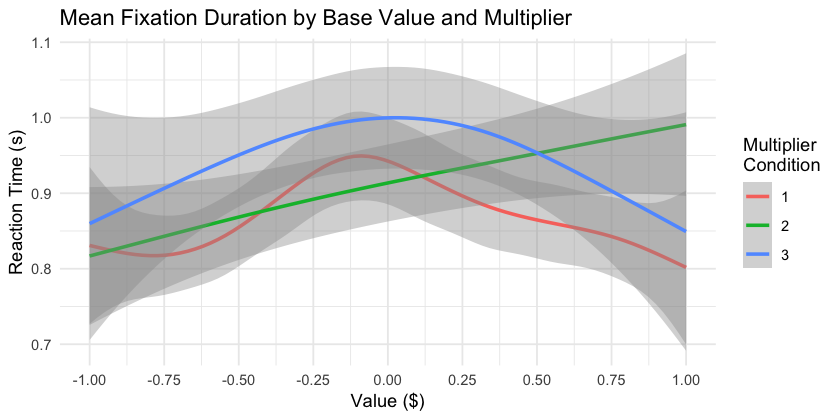

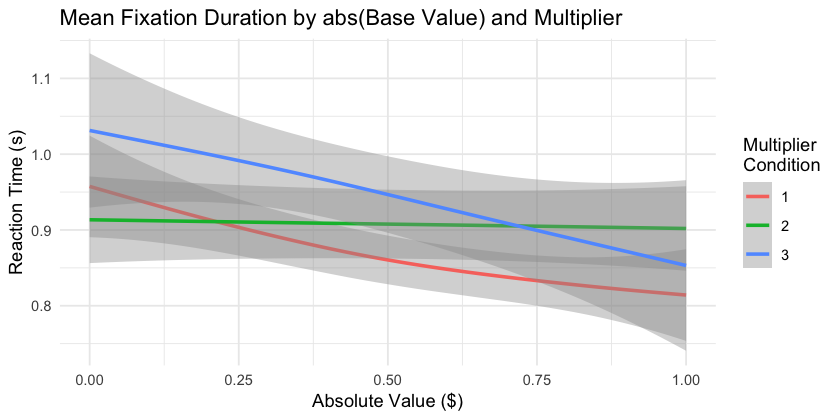

In [11]:
first_fix_plot(v1)
first_fix_plot_abs(v1)

In [12]:
v1_1.lmer <- lmer (`1_fixation` ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject),
                data = v1)
summary(v1_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: `1_fixation` ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 |  
    subject) + (1 | subject)
   Data: v1

REML criterion at convergence: 15050.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0192 -0.4720 -0.2125  0.1366  9.1979 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.05358  0.2315  
 subject.1 (Intercept)    0.20529  0.4531  
 Residual                 0.56071  0.7488  
Number of obs: 6597, groups:  subject, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              0.90977    0.10473   28.86574   8.687 1.51e-09 ***
abs_base_val_1          -0.12399    0.09184  104.31161  -1.350  0.17992    
mult_1                   0.06632    0.02501 6561.04177   2.652  0.00803 ** 
abs_base_val_1:mult_1   -0.05364    0.04580 6565.99122  -1.171  0.24153    
---
Signif. codes:  0 ‘***

---
#### V2
---

In [13]:
v2$abs_base_val_1 = abs(v2$firstVal/v2$firstMult)
v2$mult_1 = v2$firstMult

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


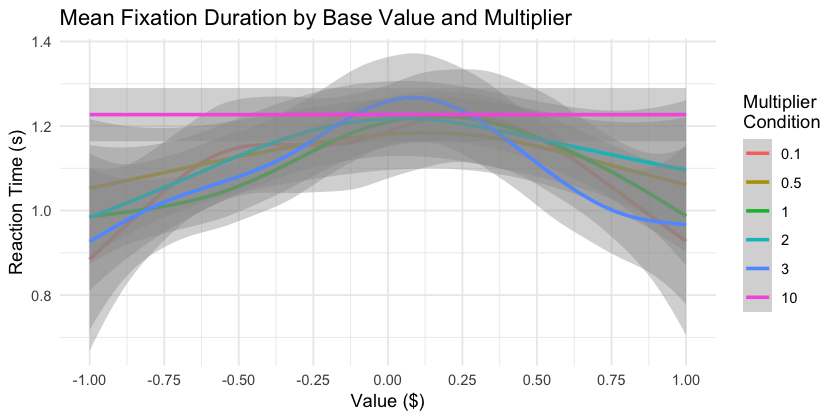

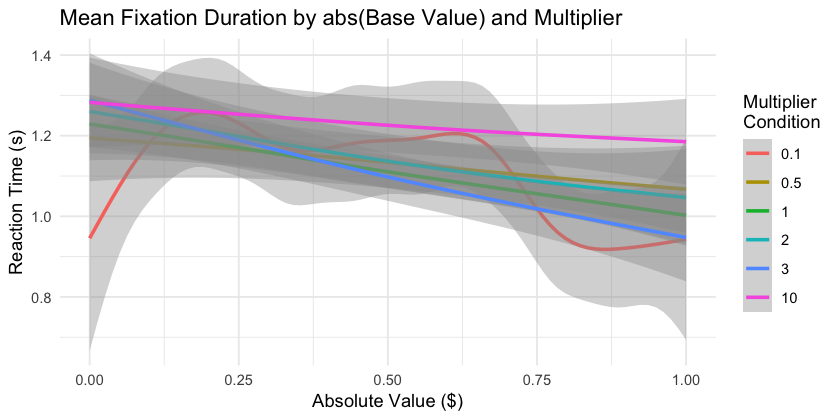

In [14]:
first_fix_plot(v2)
first_fix_plot_abs(v2)

In [15]:
#Test for SIG
v2_1.lmer <- lmer (`1_fixation` ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject), 
                   data = v2)
summary(v2_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: `1_fixation` ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 |  
    subject) + (1 | subject)
   Data: v2

REML criterion at convergence: 34484.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7651 -0.4914 -0.2544  0.1244  8.8417 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.1482   0.385   
 subject.1 (Intercept)    0.2411   0.491   
 Residual                 1.1032   1.050   
Number of obs: 11674, groups:  subject, 31

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.242e+00  9.155e-02  3.157e+01  13.563 1.03e-14 ***
abs_base_val_1        -2.629e-01  8.099e-02  3.696e+01  -3.245  0.00249 ** 
mult_1                 1.083e-02  6.528e-03  1.161e+04   1.660  0.09698 .  
abs_base_val_1:mult_1  1.070e-03  1.098e-02  1.162e+04   0.097  0.92236    
---
Signif. codes:  0 ‘**

---
#### V3.0.1
---

In [16]:
first_fix_plot = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=fix_stim_val_base, y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult)), df) +
      coord_cartesian(xlim = c(-1, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Base Value ($)", seq(-1,1,0.25), limits = c(-1,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by Base Value and Multiplier")
}

first_fix_plot_abs = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=abs(fix_stim_val_base), y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult)), df) +
      coord_cartesian(xlim = c(0, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Absolute Base Value ($)", seq(0,1,0.25), limits = c(0,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by abs(Base Value) and Multiplier")
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


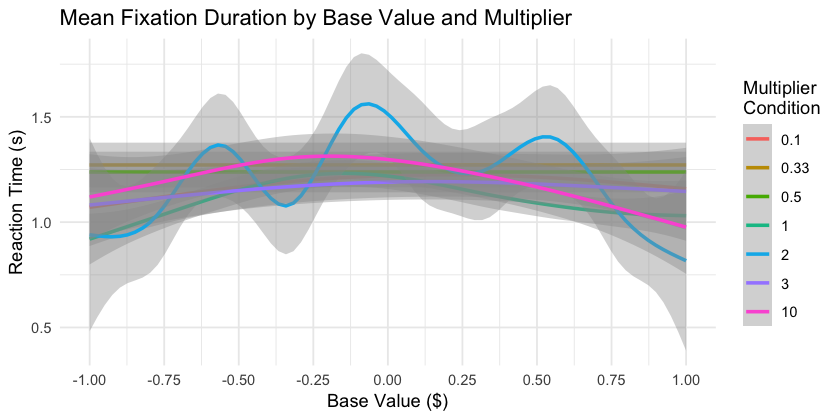

In [17]:
first_fix_plot(v301_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


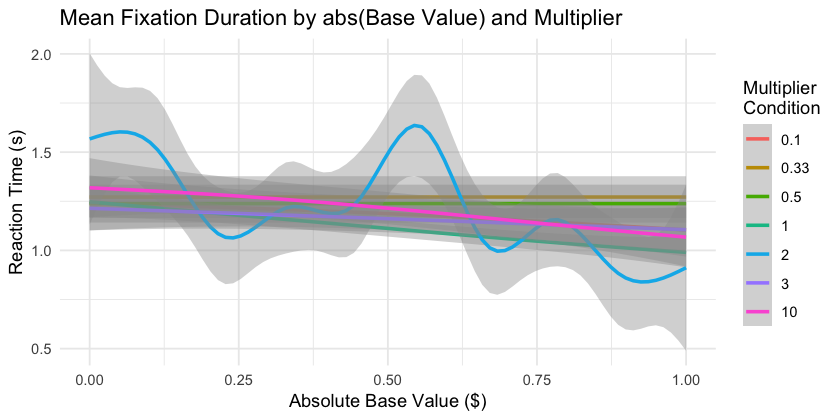

In [18]:
first_fix_plot_abs(v301_long)

In [19]:
x = v301_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [20]:
x$abs_base_val_1 = abs(x$fix_stim_val_base)
x$mult_1 = x$fix_stim_mult

In [21]:
#Test for SIG
v301_1.lmer <- lmer (fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject), 
                     data = x)
summary(v301_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 30757.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8826 -0.3581 -0.1271  0.1112 18.0807 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.7754   0.8806  
 subject.1 (Intercept)    1.1880   1.0899  
 Residual                 1.0092   1.0046  
Number of obs: 10699, groups:  subject, 31

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.446e+00  1.974e-01  2.952e+01   7.327 4.06e-08 ***
abs_base_val_1        -1.876e-01  1.640e-01  2.518e+01  -1.143    0.264    
mult_1                 3.928e-03  6.991e-03  1.063e+04   0.562    0.574    
abs_base_val_1:mult_1 -3.215e-03  1.212e-02  1.064e+04  -0.265    0.791    
---
Signif. codes:  0 ‘***’ 0.00

---
#### V3.0.2
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


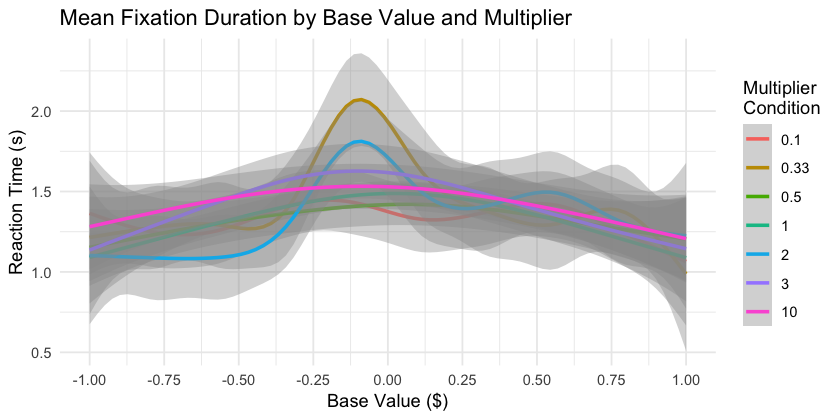

In [22]:
first_fix_plot(v302_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


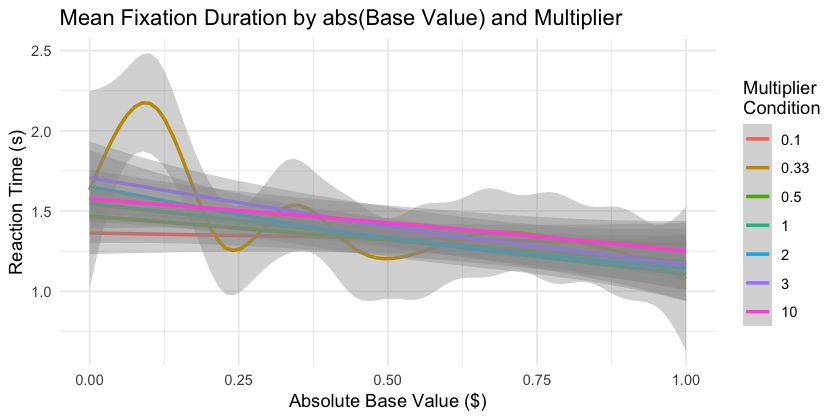

In [23]:
first_fix_plot_abs(v302_long)

In [24]:
x = v302_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [25]:
x$abs_base_val_1 = abs(x$fix_stim_val_base)
x$mult_1 = x$fix_stim_mult

In [26]:
#Test for SIG
v302_1.lmer <- lmer (fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject), 
                     data = x)
summary(v302_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 20626.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2839 -0.4248 -0.1474  0.1489 13.8413 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.5355   0.7318  
 subject.1 (Intercept)    0.9140   0.9560  
 Residual                 1.1300   1.0630  
Number of obs: 6901, groups:  subject, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.599e+00  2.019e-01  2.225e+01   7.922  6.4e-08 ***
abs_base_val_1        -5.130e-01  1.622e-01  2.323e+01  -3.163  0.00431 ** 
mult_1                 1.306e-02  9.159e-03  6.856e+03   1.425  0.15406    
abs_base_val_1:mult_1 -7.271e-03  1.589e-02  6.857e+03  -0.457  0.64738    
---
Signif. codes:  0 ‘***’ 0.001

---
#### V3.1.0: No TP
---

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


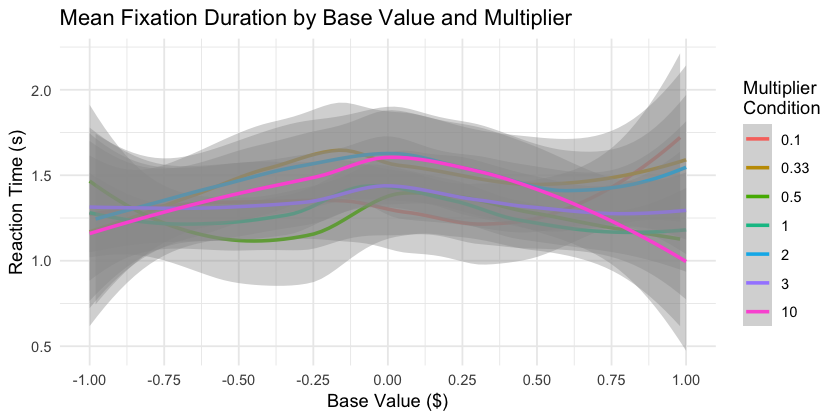

In [27]:
first_fix_plot(v310_long_notp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


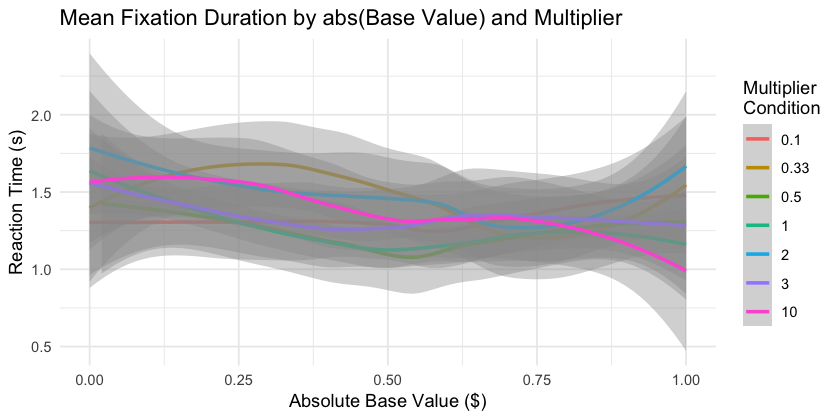

In [28]:
first_fix_plot_abs(v310_long_notp)

In [29]:
x = v310_long_notp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [30]:
x$abs_base_val_1 = abs(x$fix_stim_val_base)
x$mult_1 = x$fix_stim_mult

In [31]:
#Test for SIG
v310_notp_1.lmer <- lmer (fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject), 
                          data = x)
summary(v310_notp_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 4515.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4656 -0.5228 -0.1922  0.2648  7.5533 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.1037   0.3221  
 subject.1 (Intercept)    0.3940   0.6277  
 Residual                 0.5575   0.7467  
Number of obs: 1939, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)              1.40676    0.12632   29.63221  11.137 4.12e-12 ***
abs_base_val_1          -0.19810    0.09594   47.46733  -2.065   0.0444 *  
mult_1                   0.01882    0.01240 1912.77405   1.518   0.1291    
abs_base_val_1:mult_1   -0.02518    0.02127 1910.36997  -1.184   0.2365    
---
Signif. codes:  0 ‘***’ 0.001 

---
#### V3.1.0: TP
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


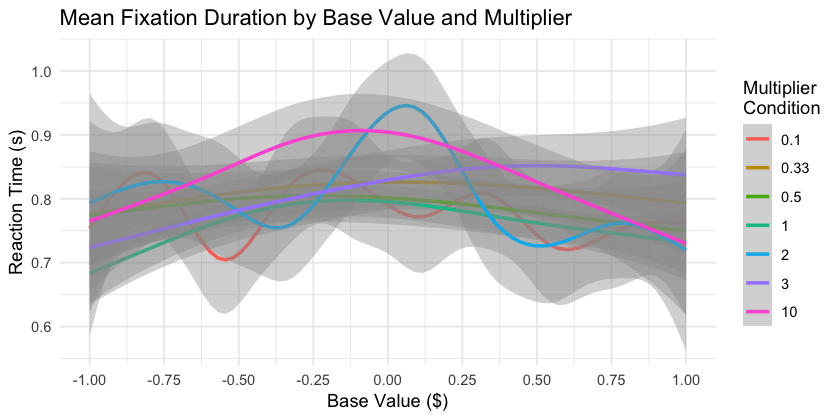

In [32]:
first_fix_plot(v310_long_tp)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


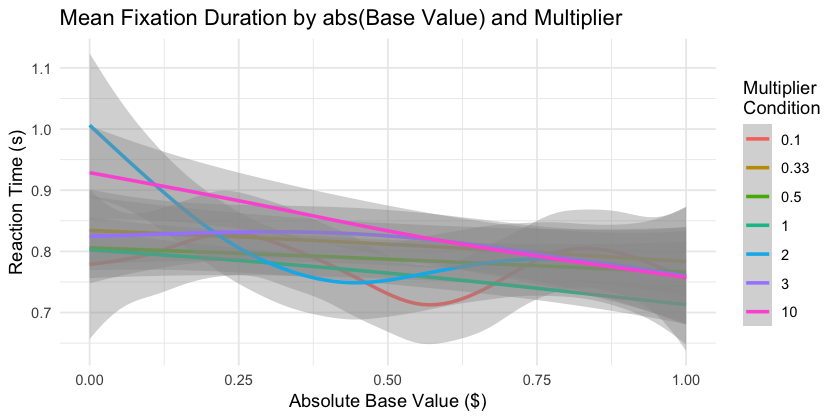

In [33]:
first_fix_plot_abs(v310_long_tp)

In [34]:
x = v310_long_tp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [35]:
x$abs_base_val_1 = abs(x$fix_stim_val_base)
x$mult_1 = x$fix_stim_mult

In [36]:
#Test for SIG
v310_tp_1.lmer <- lmer (fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1|subject) + (1|subject), 
                        data = x,
                        control = lmerControl(optimizer ="Nelder_Mead")) # wasn't converging with standard optimizer BOBYQA
summary(v310_tp_1.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_1 * mult_1 + (0 + abs_base_val_1 | subject) +  
    (1 | subject)
   Data: x
Control: lmerControl(optimizer = "Nelder_Mead")

REML criterion at convergence: 5310.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2626 -0.5152 -0.1430  0.3160  8.5428 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_1 0.04586  0.2141  
 subject.1 (Intercept)    0.15132  0.3890  
 Residual                 0.10895  0.3301  
Number of obs: 8132, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            8.181e-01  7.406e-02  2.726e+01  11.046 1.43e-11 ***
abs_base_val_1        -9.454e-02  4.333e-02  2.954e+01  -2.182 0.037198 *  
mult_1                 1.023e-02  2.661e-03  8.079e+03   3.844 0.000122 ***
abs_base_val_1:mult_1 -8.152e-03  4.585e-03  8.083e+03  -1.778

---
#### Comparisons
---

##### Table
---

In [37]:
tab_model(v1_1.lmer, v2_1.lmer, v301_1.lmer, v302_1.lmer, v310_notp_1.lmer, v310_tp_1.lmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('1', '2', '3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Base Value', 'Multiplier', 'Base Value:Multiplier'),
          title="First Fixation: Duration")

---
##### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


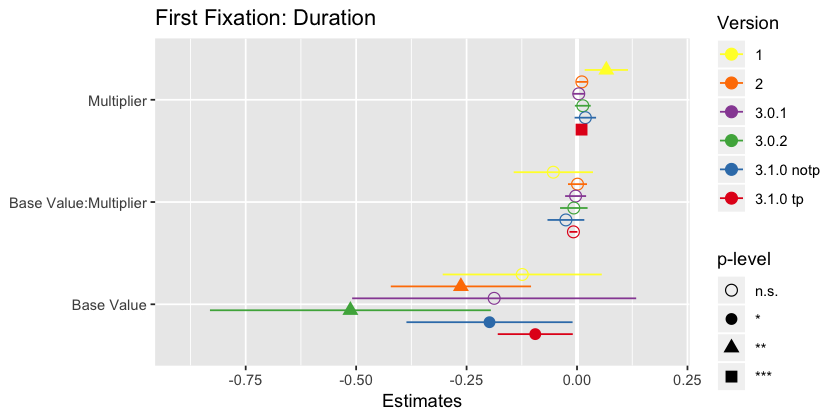

In [107]:
plot_models(v1_1.lmer, v2_1.lmer, v301_1.lmer, v302_1.lmer, v310_notp_1.lmer, v310_tp_1.lmer,
            show.p=TRUE,
            p.shape=TRUE,
            spacing=0.7,
            axis.labels = c("Base Value", "Base Value:Multiplier", "Multiplier"),
            legend.title='Version',
            m.labels=c('1', '2', '3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="First Fixation: Duration")  +  
ylim(-.9, .2) 


---
## First Mult
---

In [307]:
# need to deal with the fact that those trials where subjects only looked ONE stim, 
# are coded as 3, for last fix, rather than 1 as first fix. Maybe need a new code?


---
### V3.0.1
---

In [40]:
# trials where they did not look at any stim
v301_long %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1   1      1
2  11      2
3  15      1
4  17      1
5  20      4
6  26      1
7  27      4
8  77      1
9  81      1
10 82      1
11 83      1
12 85      7
13 88      1
14 93      1

In [41]:
# percent left first
side_1 = v301_long %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

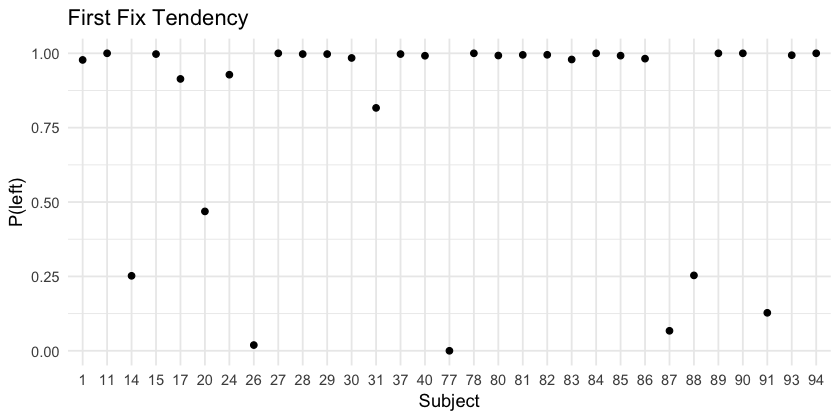

In [42]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [43]:
x = v301_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)


In [44]:
v301_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v301_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2988.6   3025.0  -1489.3   2978.6    10694 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3951 -0.1187 -0.0538 -0.0222 18.7359 

Random effects:
 Groups  Name           Variance Std.Dev. Corr 
 subject (Intercept)    18.65421 4.3191        
         left_mult_pull  0.02066 0.1437   -0.40
Number of obs: 10699, groups:  subject, 31

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.98463    0.79468  -5.014 5.33e-07 ***
left_mult_pull -0.05094    0.03976  -1.281      0.2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll -0.243

---
### V3.0.2
---

In [45]:
# trials where they did not look at any stim
v302_long %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N 
1  41       1
2  43       1
3  47       4
4  50       1
5  53       2
6  56       1
7  58       5
8  63      45
9  65       3
10 67       2
11 72       2
12 73       1
13 74       1
14 75       2

In [46]:
# percent left first
side_1 = v302_long %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

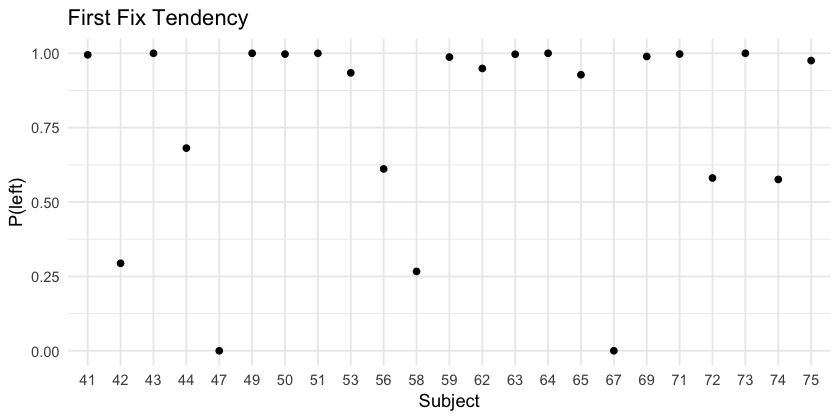

In [47]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [48]:
x = v302_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)


In [49]:
v302_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v302_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2839.0   2873.2  -1414.5   2829.0     6896 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1680 -0.1181 -0.0505 -0.0204 19.1073 

Random effects:
 Groups  Name           Variance  Std.Dev. Corr
 subject (Intercept)    23.028701 4.79882      
         left_mult_pull  0.006148 0.07841  0.66
Number of obs: 6901, groups:  subject, 23

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -3.34241    1.01865  -3.281  0.00103 **
left_mult_pull -0.04756    0.03544  -1.342  0.17964   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll 0.336 

---
### V3.1.0 notp
---

In [50]:
# trials where they did not look at any stim
v310_long_notp %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1 125     1
2 137     1

In [51]:
# percent left first
side_1 = v310_long_notp %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

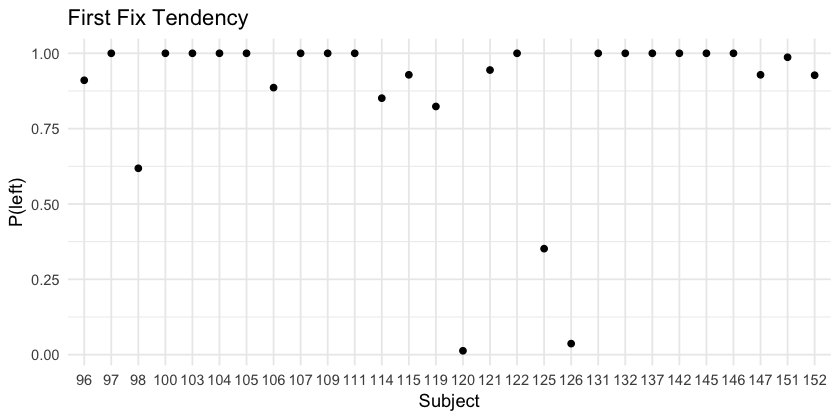

In [52]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [53]:
x = v310_long_notp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)

In [54]:
v310_notp_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_notp_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
   650.9    678.8   -320.5    640.9     1934 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1162 -0.2371 -0.0165 -0.0141  8.9580 

Random effects:
 Groups  Name           Variance Std.Dev. Corr 
 subject (Intercept)    40.17552 6.3384        
         left_mult_pull  0.09372 0.3061   -0.93
Number of obs: 1939, groups:  subject, 28

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -7.3775     2.4866  -2.967  0.00301 **
left_mult_pull   0.1726     0.1691   1.021  0.30747   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll -0.667

---
### V3.1.0 tp
---

In [55]:
# trials where they did not look at any stim
v310_long_tp %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1   96     1
2   98     6
3  106     1
4  107     1
5  119     5
6  125     1
7  126     2
8  137     5
9  142     1
10 145     1
11 146     2
12 151     3
13 152     1

In [56]:
# percent left first
side_1 = v310_long_tp %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

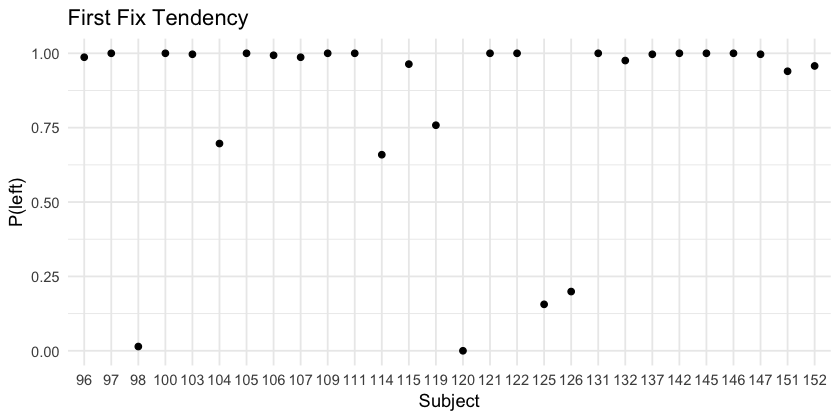

In [57]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [58]:
x = v310_long_tp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)

In [59]:
v310_tp_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (0 + left_mult_pull | subject) + (1|subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_tp_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (0 + left_mult_pull | subject) +  
    (1 | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2078.7   2106.8  -1035.4   2070.7     8128 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.6057 -0.1080 -0.0178 -0.0167 18.4871 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   left_mult_pull  0.01054 0.1027  
 subject.1 (Intercept)    28.31282 5.3210  
Number of obs: 8132, groups:  subject, 28

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.55976    1.29406  -4.296 1.74e-05 ***
left_mult_pull -0.08920    0.03538  -2.521   0.0117 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll 0.034 

---
### Comparisons
---

#### Table
---

In [60]:
tab_model(v301_1.glmer, v302_1.glmer, v310_notp_1.glmer, v310_tp_1.glmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Left Mult Pull'),
          title="First Fixation: Mutliplier Choice")

Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.


---
#### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


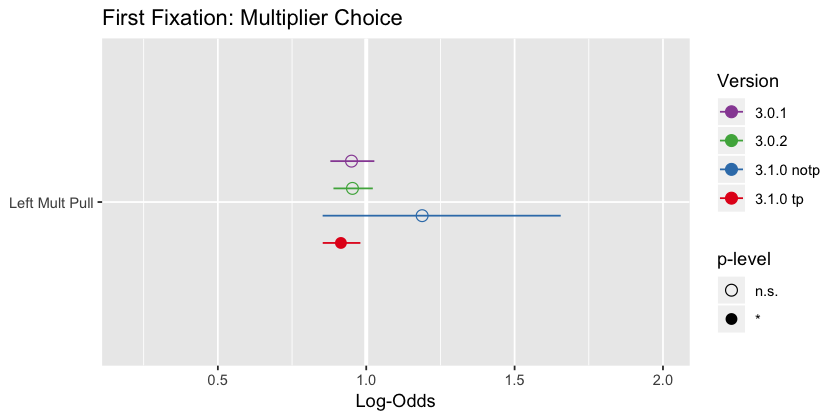

In [61]:
plot_models(v301_1.glmer, v302_1.glmer, v310_notp_1.glmer, v310_tp_1.glmer,
            show.p=TRUE,
            p.shape=TRUE,
            axis.labels = c('Left Mult Pull'),
            legend.title='Version',
            m.labels=c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="First Fixation: Multiplier Choice")  +  
ylim(0.2, 2)


---
## Middle (2nd) Fixation
---

### Duration
---

In [62]:
second_fix_plot = function(df){

    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=secondVal/secondMult, y=`2_fixation`, group = factor(secondMult), colour = factor(secondMult)), df) +
      coord_cartesian(xlim = c(-1, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Value ($)", seq(-1,1,0.25), limits = c(-1,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by Base Value and Multiplier")
}

second_fix_plot_abs = function(df){
    ggplot() +
      geom_smooth(aes(x=abs(secondVal/secondMult), y=`2_fixation`, group = factor(secondMult), colour = factor(secondMult)), df) +
      #geom_smooth(aes(x=summedVal, y=rt, colour = "flip"), subset(df, flip==1)) +
      coord_cartesian(xlim = c(0, 1))  +
      #ggtitle("RT vs. Summed Val")
      #geom_point(shape=1) +    # Use hollow circles
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Absolute Value ($)", seq(0,1,0.25), limits = c(0,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by abs(Base Value) and Multiplier")
}

---
#### V1
---

In [63]:
v1$abs_base_val_2 = abs(v1$secondVal/v1$secondMult)
v1$mult_2 = v1$secondMult

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 17 rows containing non-finite values (stat_smooth).”

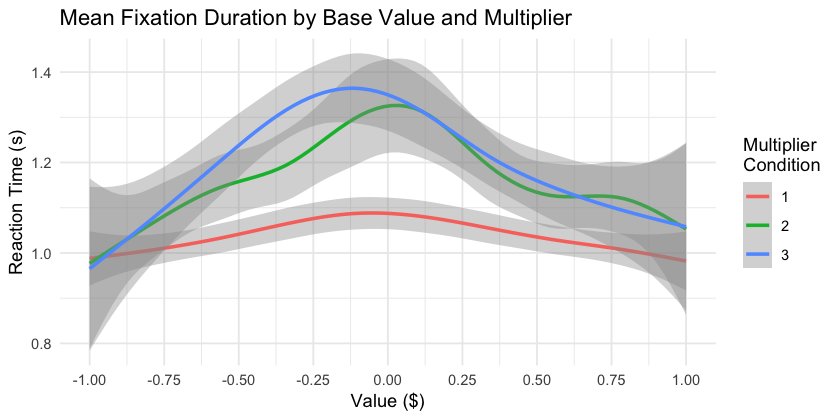

In [64]:
second_fix_plot(v1)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 17 rows containing non-finite values (stat_smooth).”

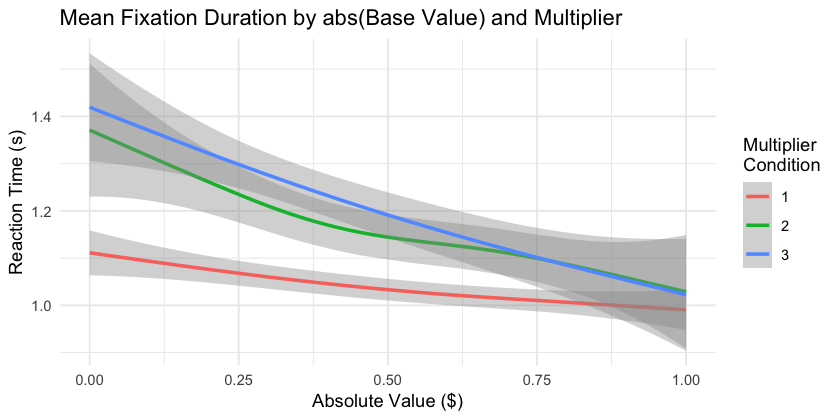

In [65]:
second_fix_plot_abs(v1)

In [66]:
v1_2.lmer <- lmer (`2_fixation` ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject),
                data = v1)
summary(v1_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: `2_fixation` ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 |  
    subject) + (1 | subject)
   Data: v1

REML criterion at convergence: 11002.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2884 -0.5214 -0.1951  0.2621 12.0883 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.03221  0.1795  
 subject.1 (Intercept)    0.10133  0.3183  
 Residual                 0.30476  0.5520  
Number of obs: 6580, groups:  subject, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            9.918e-01  7.425e-02  3.074e+01  13.357 2.43e-14 ***
abs_base_val_2        -5.803e-03  6.847e-02  1.064e+02  -0.085    0.933    
mult_2                 1.497e-01  1.846e-02  6.545e+03   8.111 5.95e-16 ***
abs_base_val_2:mult_2 -1.449e-01  3.400e-02  6.544e+03  -4.261 2.06e-05 ***
---
Signif. codes:  0 ‘***

---
#### V2
---

In [67]:
v2$abs_base_val_2 = abs(v2$secondVal/v2$secondMult)
v2$mult_2 = v2$secondMult

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


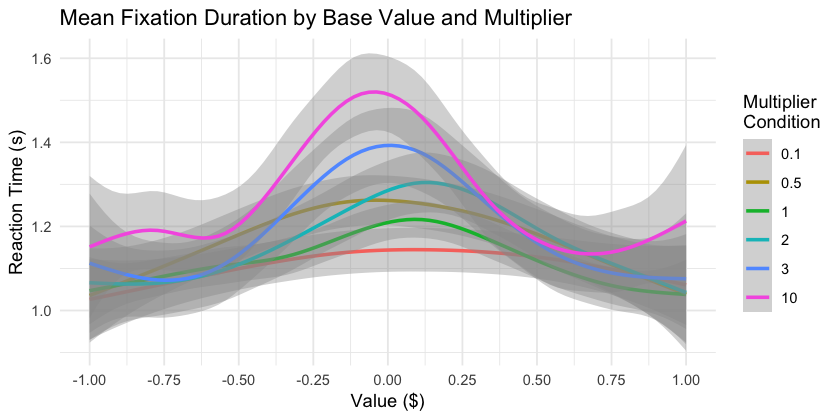

In [68]:
second_fix_plot(v2)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


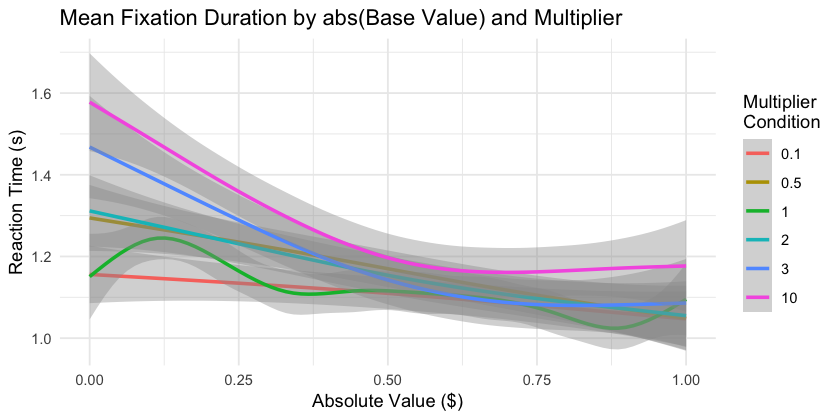

In [69]:
second_fix_plot_abs(v2)

In [70]:
#Test for SIG
v2_2.lmer <- lmer (`2_fixation` ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject), 
                   data = v2)
summary(v2_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: `2_fixation` ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 |  
    subject) + (1 | subject)
   Data: v2

REML criterion at convergence: 23166.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3015 -0.5189 -0.2157  0.2453 13.3780 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.0446   0.2112  
 subject.1 (Intercept)    0.1072   0.3275  
 Residual                 0.4183   0.6468  
Number of obs: 11674, groups:  subject, 31

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.229e+00  6.077e-02  3.130e+01  20.225  < 2e-16 ***
abs_base_val_2        -2.070e-01  4.597e-02  3.860e+01  -4.503 6.02e-05 ***
mult_2                 2.596e-02  4.142e-03  1.162e+04   6.268 3.79e-10 ***
abs_base_val_2:mult_2 -2.248e-02  7.085e-03  1.162e+04  -3.172  0.00152 ** 
---
Signif. codes:  0 ‘**

---
#### V3.0.1
---

In [71]:
mid_fix_plot = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=fix_stim_val_base, y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult)), df) +
      coord_cartesian(xlim = c(-1, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Base Value ($)", seq(-1,1,0.25), limits = c(-1,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by Base Value and Multiplier")
}

mid_fix_plot_abs = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot() +
      geom_smooth(aes(x=abs(fix_stim_val_base), y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult)), df) +
      coord_cartesian(xlim = c(0, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Absolute Base Value ($)", seq(0,1,0.25), limits = c(0,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by abs(Base Value) and Multiplier")
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


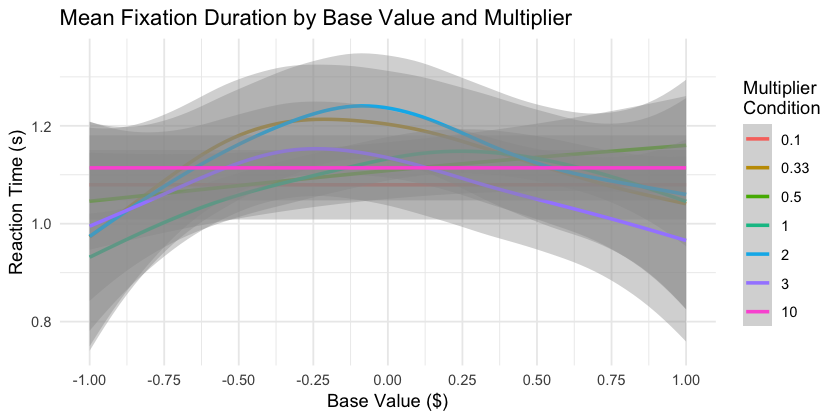

In [72]:
mid_fix_plot(v301_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


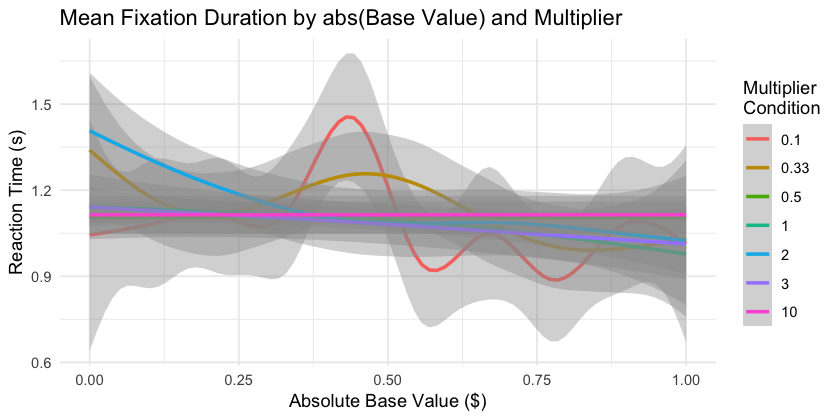

In [73]:
mid_fix_plot_abs(v301_long)

In [74]:
table(v301_long$which_fix)


    0     1     2     3 
42261 10699  9905 10816 

In [75]:
x = v301_long %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [76]:
x$abs_base_val_2 = abs(x$fix_stim_val_base)
x$mult_2 = x$fix_stim_mult

In [77]:
#Test for SIG
v301_2.lmer <- lmer (fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject), 
                     data = x)
summary(v301_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 25322

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8485 -0.4703 -0.1631  0.2409 18.8614 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.02212  0.1487  
 subject.1 (Intercept)    0.35750  0.5979  
 Residual                 0.74058  0.8606  
Number of obs: 9905, groups:  subject, 31

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.216e+00  1.098e-01  3.085e+01  11.077  2.8e-12 ***
abs_base_val_2        -1.340e-01  4.664e-02  5.106e+01  -2.874   0.0059 ** 
mult_2                 4.488e-03  6.587e-03  9.864e+03   0.681   0.4957    
abs_base_val_2:mult_2 -2.947e-03  1.200e-02  9.861e+03  -0.246   0.8060    
---
Signif. codes:  0 ‘***’ 0.001 ‘

---
#### V3.0.2
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


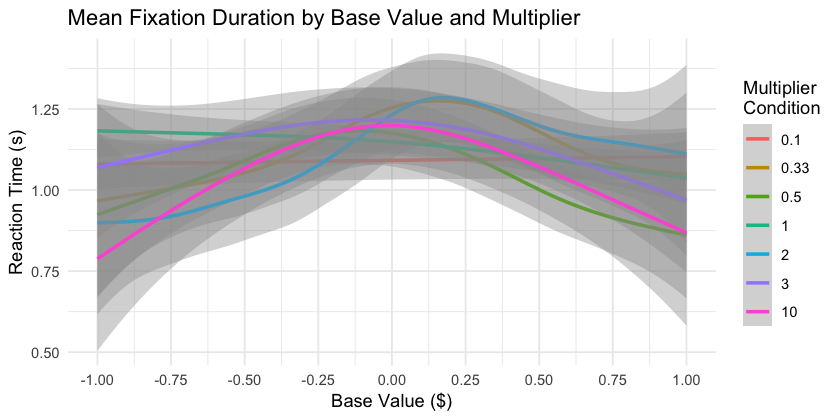

In [78]:
mid_fix_plot(v302_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


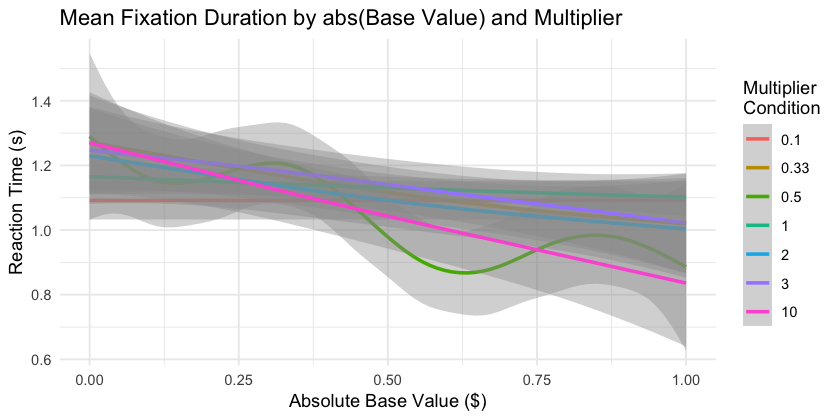

In [79]:
mid_fix_plot_abs(v302_long)

In [80]:
table(v302_long$which_fix)


    0     1     2     3 
28764  6901  7521  7136 

In [81]:
x = v302_long %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [82]:
x$abs_base_val_2 = abs(x$fix_stim_val_base)
x$mult_2 = x$fix_stim_mult

In [83]:
#Test for SIG
v302_2.lmer <- lmer (fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject), 
                     data = x)
summary(v302_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 18816

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8081 -0.4906 -0.1842  0.2120 11.6312 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.0224   0.1497  
 subject.1 (Intercept)    0.2166   0.4654  
 Residual                 0.7020   0.8379  
Number of obs: 7521, groups:  subject, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.219e+00  1.004e-01  2.317e+01  12.139 1.59e-11 ***
abs_base_val_2        -1.012e-01  5.333e-02  3.352e+01  -1.899  0.06626 .  
mult_2                 2.182e-02  7.266e-03  7.486e+03   3.003  0.00268 ** 
abs_base_val_2:mult_2 -4.108e-02  1.404e-02  7.477e+03  -2.925  0.00346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘

---
#### V3.1.0: notp
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


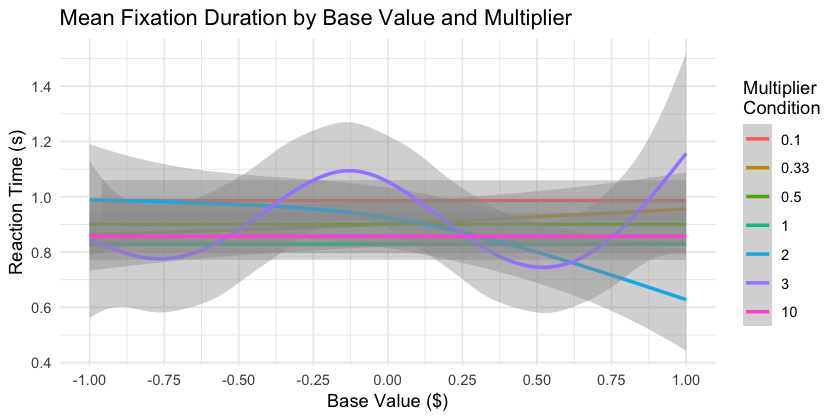

In [84]:
mid_fix_plot(v310_long_notp)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


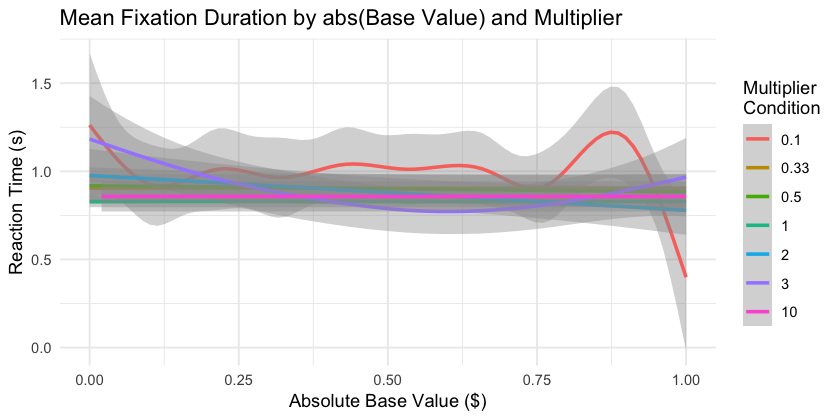

In [85]:
mid_fix_plot_abs(v310_long_notp)

In [86]:
x = v310_long_notp %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [87]:
x$abs_base_val_2 = abs(x$fix_stim_val_base)
x$mult_2 = x$fix_stim_mult

In [88]:
#Test for SIG
v310_notp_2.lmer <- lmer (fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject), 
                          data = x)
summary(v310_notp_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 3531.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7219 -0.6106 -0.1814  0.3320  8.5452 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.006505 0.08065 
 subject.1 (Intercept)    0.097118 0.31164 
 Residual                 0.258714 0.50864 
Number of obs: 2303, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            9.976e-01  6.584e-02  3.361e+01  15.151   <2e-16 ***
abs_base_val_2        -2.660e-02  4.874e-02  3.434e+01  -0.546    0.589    
mult_2                 1.362e-02  8.507e-03  2.256e+03   1.601    0.109    
abs_base_val_2:mult_2 -1.424e-02  1.445e-02  2.200e+03  -0.986    0.324    
---
Signif. codes:  0 ‘***’ 0.001 

---
#### V3.1.0: tp
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


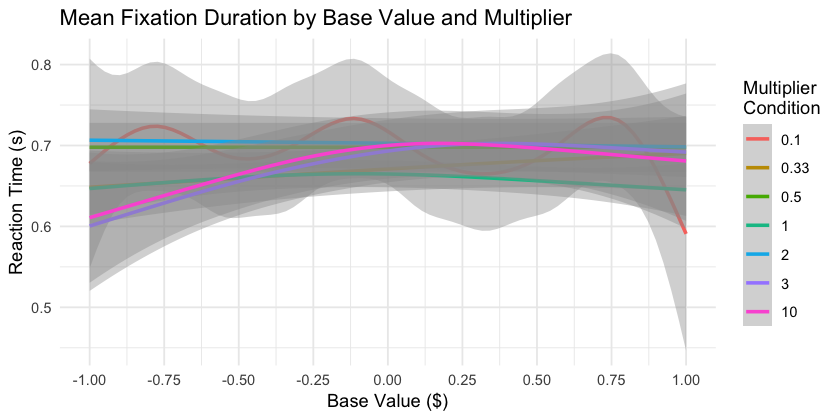

In [89]:
mid_fix_plot(v310_long_tp)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


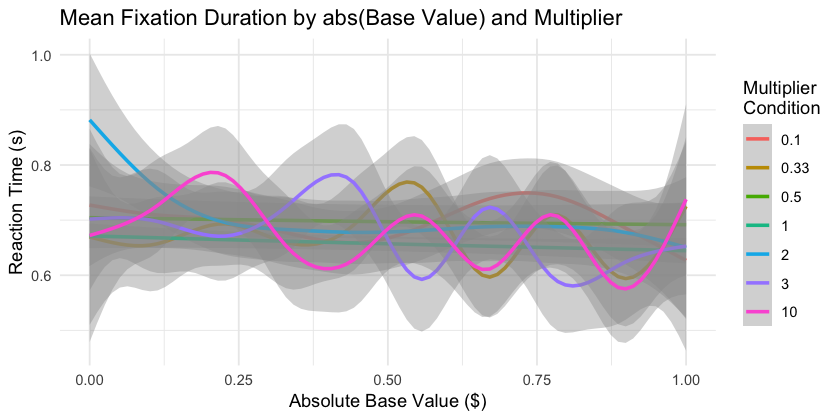

In [90]:
mid_fix_plot_abs(v310_long_tp)

In [91]:
x = v310_long_tp %>%
        filter(which_fix == 2) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [92]:
x$abs_base_val_2 = abs(x$fix_stim_val_base)
x$mult_2 = x$fix_stim_mult

In [93]:
#Test for SIG
v310_tp_2.lmer <- lmer (fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2|subject) + (1|subject), 
                        data = x,
                        control = lmerControl(optimizer ="Nelder_Mead")) # wasn't converging with standard optimizer BOBYQA
summary(v310_tp_2.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_2 * mult_2 + (0 + abs_base_val_2 | subject) +  
    (1 | subject)
   Data: x
Control: lmerControl(optimizer = "Nelder_Mead")

REML criterion at convergence: 3047.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8646 -0.5682 -0.1263  0.4348  7.4074 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_2 0.005163 0.07185 
 subject.1 (Intercept)    0.051895 0.22780 
 Residual                 0.088115 0.29684 
Number of obs: 7031, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            7.673e-01  4.432e-02  2.797e+01  17.312   <2e-16 ***
abs_base_val_2        -5.545e-02  2.185e-02  2.481e+01  -2.537   0.0178 *  
mult_2                 4.424e-03  2.770e-03  7.003e+03   1.597   0.1103    
abs_base_val_2:mult_2 -5.966e-03  4.955e-03  6.994e+03  -1.204

---
#### Comparisons
---

##### Table
---

In [94]:
tab_model(v1_2.lmer, v2_2.lmer, v301_2.lmer, v302_2.lmer, v310_notp_2.lmer, v310_tp_2.lmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('1', '2', '3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Base Value', 'Multiplier', 'Base Value:Multiplier'),
          title="Second Fixation: Duration")

---
##### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


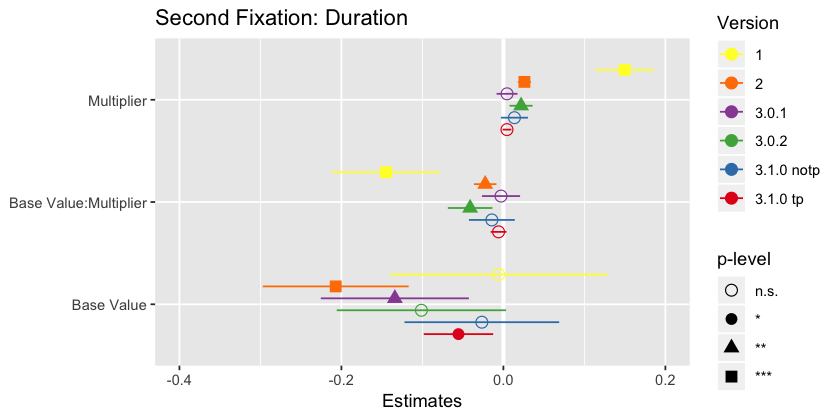

In [106]:
plot_models(v1_2.lmer, v2_2.lmer, v301_2.lmer, v302_2.lmer, v310_notp_2.lmer, v310_tp_2.lmer,
            show.p=T,
            p.shape=TRUE,     
            spacing=0.7,
            axis.labels = c("Base Value", "Base Value:Multiplier", "Multiplier"),
            legend.title='Version',
            m.labels=c('1', '2', '3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="Second Fixation: Duration")  +  
ylim(-.4, .2) 


---
### V3.0.1
---

In [40]:
# trials where they did not look at any stim
v301_long %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1   1      1
2  11      2
3  15      1
4  17      1
5  20      4
6  26      1
7  27      4
8  77      1
9  81      1
10 82      1
11 83      1
12 85      7
13 88      1
14 93      1

In [41]:
# percent left first
side_1 = v301_long %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

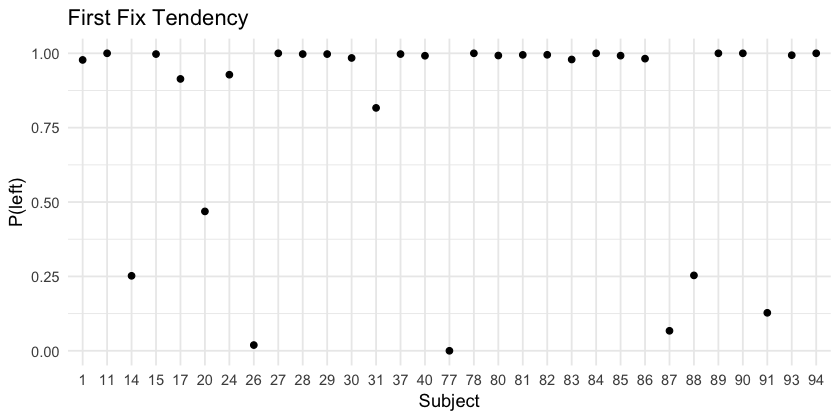

In [42]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [43]:
x = v301_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)


In [44]:
v301_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v301_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2988.6   3025.0  -1489.3   2978.6    10694 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3951 -0.1187 -0.0538 -0.0222 18.7359 

Random effects:
 Groups  Name           Variance Std.Dev. Corr 
 subject (Intercept)    18.65421 4.3191        
         left_mult_pull  0.02066 0.1437   -0.40
Number of obs: 10699, groups:  subject, 31

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -3.98463    0.79468  -5.014 5.33e-07 ***
left_mult_pull -0.05094    0.03976  -1.281      0.2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll -0.243

---
### V3.0.2
---

In [45]:
# trials where they did not look at any stim
v302_long %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N 
1  41       1
2  43       1
3  47       4
4  50       1
5  53       2
6  56       1
7  58       5
8  63      45
9  65       3
10 67       2
11 72       2
12 73       1
13 74       1
14 75       2

In [46]:
# percent left first
side_1 = v302_long %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

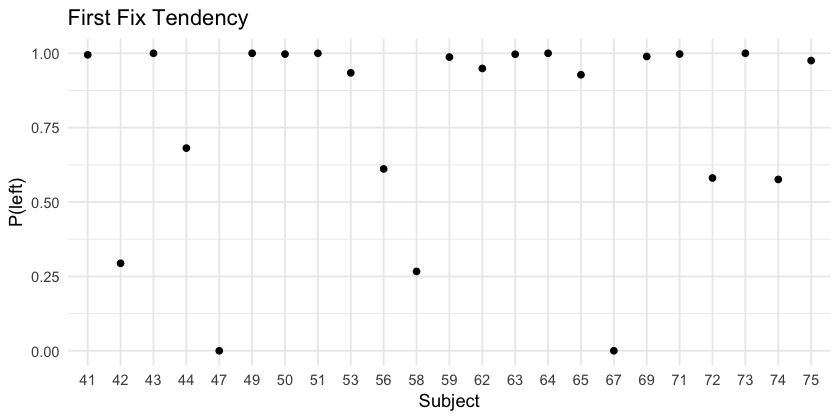

In [47]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [48]:
x = v302_long %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)


In [49]:
v302_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v302_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2839.0   2873.2  -1414.5   2829.0     6896 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1680 -0.1181 -0.0505 -0.0204 19.1073 

Random effects:
 Groups  Name           Variance  Std.Dev. Corr
 subject (Intercept)    23.028701 4.79882      
         left_mult_pull  0.006148 0.07841  0.66
Number of obs: 6901, groups:  subject, 23

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)    -3.34241    1.01865  -3.281  0.00103 **
left_mult_pull -0.04756    0.03544  -1.342  0.17964   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll 0.336 

---
### V3.1.0 notp
---

In [50]:
# trials where they did not look at any stim
v310_long_notp %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1 125     1
2 137     1

In [51]:
# percent left first
side_1 = v310_long_notp %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

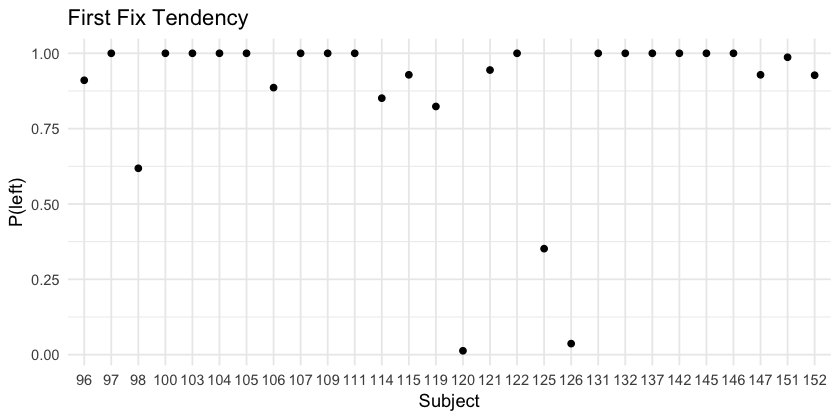

In [52]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [53]:
x = v310_long_notp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)

In [54]:
v310_notp_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_notp_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (1 + left_mult_pull | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
   650.9    678.8   -320.5    640.9     1934 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1162 -0.2371 -0.0165 -0.0141  8.9580 

Random effects:
 Groups  Name           Variance Std.Dev. Corr 
 subject (Intercept)    40.17552 6.3384        
         left_mult_pull  0.09372 0.3061   -0.93
Number of obs: 1939, groups:  subject, 28

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -7.3775     2.4866  -2.967  0.00301 **
left_mult_pull   0.1726     0.1691   1.021  0.30747   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll -0.667

---
### V3.1.0 tp
---

In [55]:
# trials where they did not look at any stim
v310_long_tp %>%
        filter(total_stim_fix == 0) %>%
        group_by(subject)%>%
        summarise(N = length(unique(trial)))

subject N
1   96     1
2   98     6
3  106     1
4  107     1
5  119     5
6  125     1
7  126     2
8  137     5
9  142     1
10 145     1
11 146     2
12 151     3
13 152     1

In [56]:
# percent left first
side_1 = v310_long_tp %>%
        filter(which_fix == 1) %>%
        group_by(subject) %>%
        summarise(left = sum(fix_stim=='left'),
                  right = sum(fix_stim=='right'),
                  pct_left_1 = sum(fix_stim=='left')/(sum(fix_stim=='left') + sum(fix_stim=='right'))) %>%
        select(subject, left, right, pct_left_1)

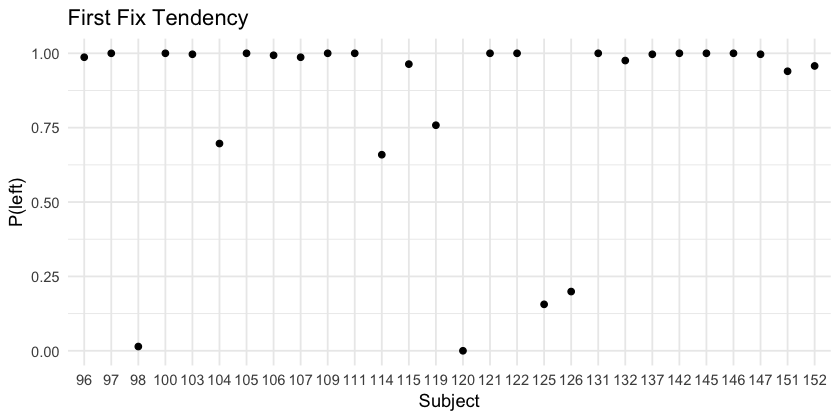

In [57]:
ggplot(side_1, aes(factor(subject), pct_left_1)) + 
    geom_point() +
    labs(title = "First Fix Tendency", x = "Subject", y = "P(left)") +
    theme_minimal()

In [58]:
x = v310_long_tp %>%
        filter(which_fix == 1) %>%
        select(subject, trial, fix_stim, left_mult_pull)

In [59]:
v310_tp_1.glmer <- glmer(factor(fix_stim) ~ left_mult_pull + (0 + left_mult_pull | subject) + (1|subject), 
                    data = x, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_tp_1.glmer)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: factor(fix_stim) ~ left_mult_pull + (0 + left_mult_pull | subject) +  
    (1 | subject)
   Data: x
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  2078.7   2106.8  -1035.4   2070.7     8128 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.6057 -0.1080 -0.0178 -0.0167 18.4871 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   left_mult_pull  0.01054 0.1027  
 subject.1 (Intercept)    28.31282 5.3210  
Number of obs: 8132, groups:  subject, 28

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.55976    1.29406  -4.296 1.74e-05 ***
left_mult_pull -0.08920    0.03538  -2.521   0.0117 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
lft_mlt_pll 0.034 

---
### Comparisons
---

#### Table
---

In [60]:
tab_model(v301_1.glmer, v302_1.glmer, v310_notp_1.glmer, v310_tp_1.glmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Left Mult Pull'),
          title="First Fixation: Mutliplier Choice")

Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.


---
#### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


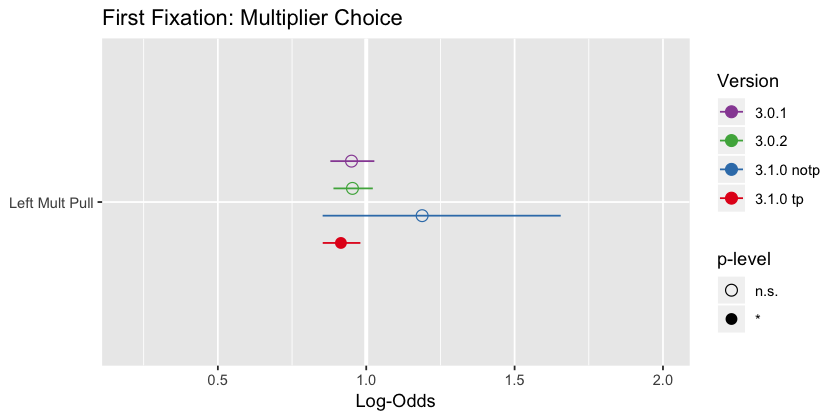

In [61]:
plot_models(v301_1.glmer, v302_1.glmer, v310_notp_1.glmer, v310_tp_1.glmer,
            show.p=TRUE,
            p.shape=TRUE,
            axis.labels = c('Left Mult Pull'),
            legend.title='Version',
            m.labels=c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="First Fixation: Multiplier Choice")  +  
ylim(0.2, 2)


---
## Final Fixation
---

### Duration

#### V1

In [ ]:
# don't have this easily coded at the moment
# look at the aDDM r file


#### V2

#### V3.0.1

In [27]:
final_fix_plot = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot(df, aes(x=fix_stim_val_base, y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult))) +
      coord_cartesian(xlim = c(-1, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Base Value ($)", seq(-1,1,0.25), limits = c(-1,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by Base Value and Multiplier")
}

final_fix_plot_abs = function(df_long){
    # get first fix val and mult
    df = df_long %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)
    
    #RT vs. Summed Value
    ggplot(df, aes(x=abs(fix_stim_val_base), y=fix_rt, 
                      group = factor(fix_stim_mult), 
                      colour = factor(fix_stim_mult)), df) +
      coord_cartesian(xlim = c(0, 1))  +
      geom_smooth() +  # Add a loess smoothed fit curve with confidence region
      theme_minimal()+
      guides(colour=guide_legend("Multiplier \nCondition")) +
      scale_x_continuous(name="Absolute Base Value ($)", seq(0,1,0.25), limits = c(0,1))+
      scale_y_continuous(name = "Reaction Time (s)") +
      ggtitle("Mean Fixation Duration by abs(Base Value) and Multiplier")
}

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


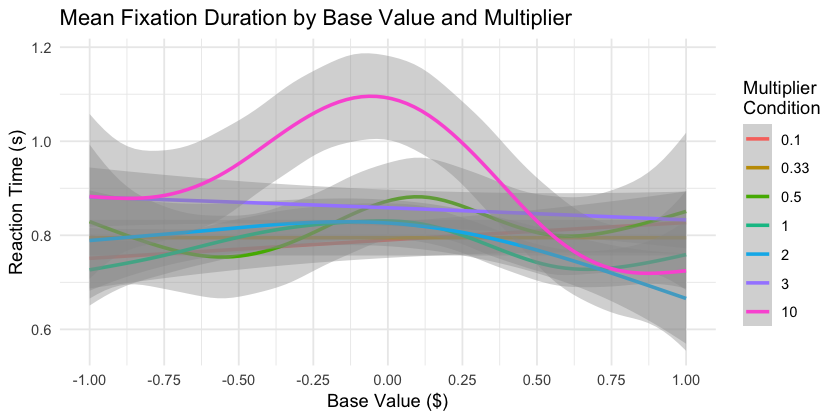

In [28]:
final_fix_plot(v301_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


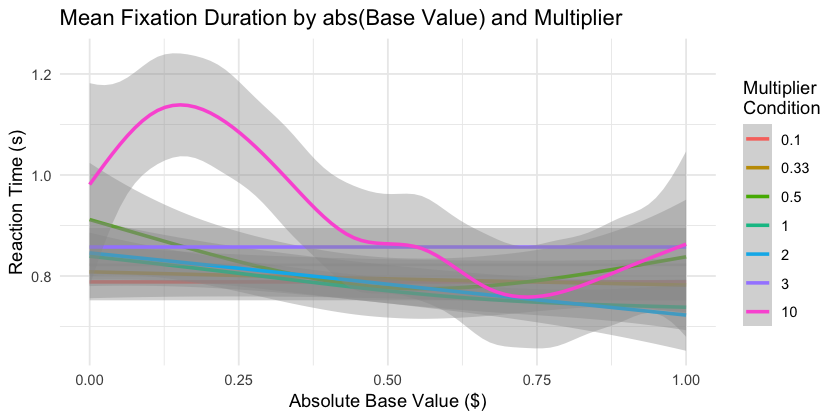

In [29]:
final_fix_plot_abs(v301_long)

In [112]:
x = v301_long %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [113]:
x$abs_base_val_3 = abs(x$fix_stim_val_base)
x$mult_3 = x$fix_stim_mult

In [114]:
#Test for SIG
v301_3.lmer <- lmer (fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3|subject) + (1|subject), 
                     data = x)
summary(v301_3.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 19572.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6073 -0.5589 -0.1656  0.2967 13.1730 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_3 0.03109  0.1763  
 subject.1 (Intercept)    0.09913  0.3148  
 Residual                 0.35091  0.5924  
Number of obs: 10816, groups:  subject, 31

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            8.493e-01  5.834e-02  3.108e+01  14.559 1.99e-15 ***
abs_base_val_3        -6.260e-02  4.024e-02  4.004e+01  -1.556    0.128    
mult_3                 2.842e-02  3.902e-03  1.077e+04   7.283 3.49e-13 ***
abs_base_val_3:mult_3 -2.983e-02  6.695e-03  1.077e+04  -4.456 8.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.00

---
#### V3.0.2
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


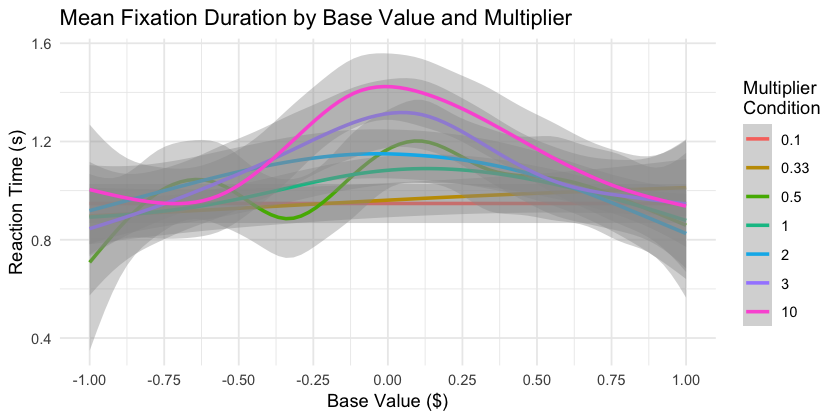

In [115]:
final_fix_plot(v302_long)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


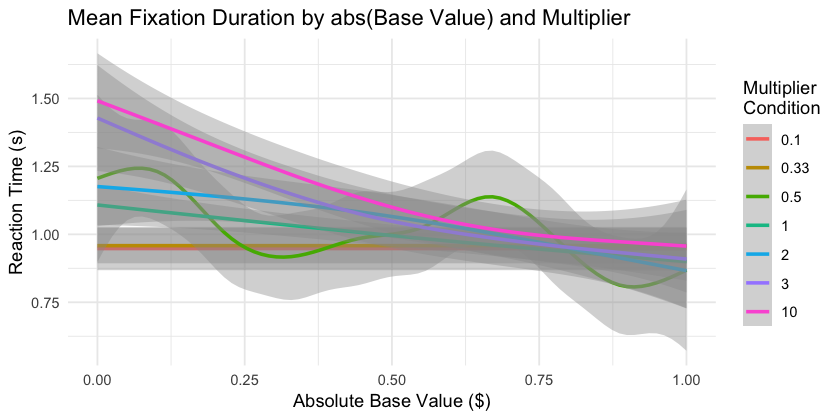

In [116]:
final_fix_plot_abs(v302_long)

In [117]:
x = v302_long %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [118]:
x$abs_base_val_3 = abs(x$fix_stim_val_base)
x$mult_3 = x$fix_stim_mult

In [119]:
#Test for SIG
v302_3.lmer <- lmer (fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3|subject) + (1|subject), 
                     data = x)
summary(v302_3.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 17820.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8514 -0.5150 -0.1583  0.2222 12.6664 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_3 0.1434   0.3787  
 subject.1 (Intercept)    0.3050   0.5523  
 Residual                 0.6942   0.8332  
Number of obs: 7136, groups:  subject, 23

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.097e+00  1.180e-01  2.260e+01   9.298 3.48e-09 ***
abs_base_val_3        -2.178e-01  9.019e-02  2.581e+01  -2.415 0.023117 *  
mult_3                 3.806e-02  6.389e-03  7.103e+03   5.958 2.68e-09 ***
abs_base_val_3:mult_3 -3.997e-02  1.094e-02  7.103e+03  -3.653 0.000261 ***
---
Signif. codes:  0 ‘***’ 0.001

---
#### V3.1.0 notp
---

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


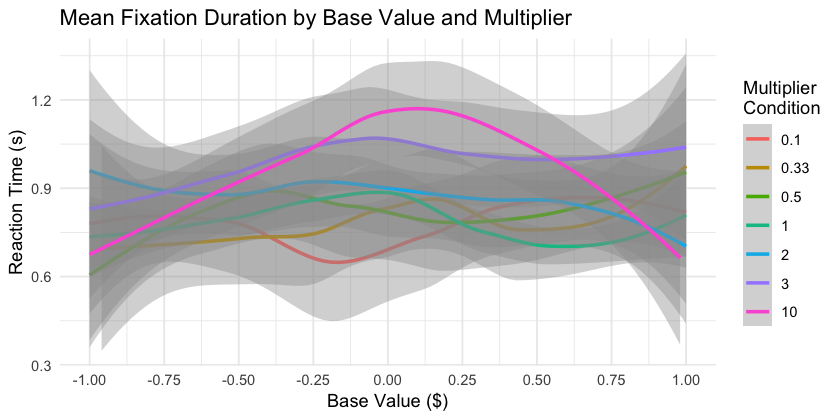

In [120]:
final_fix_plot(v310_long_notp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


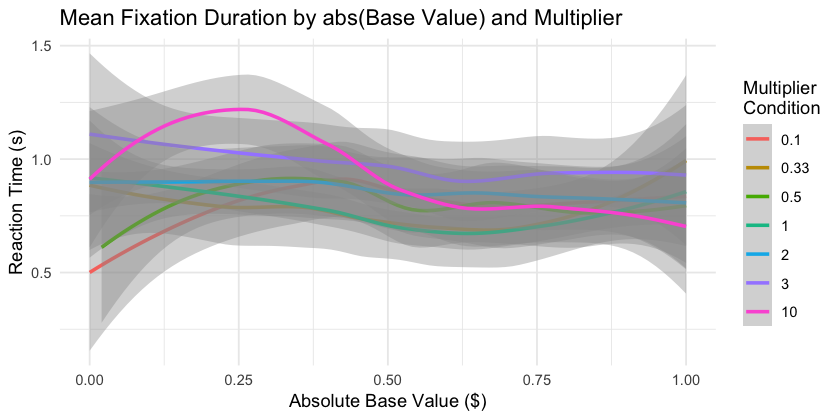

In [121]:
final_fix_plot_abs(v310_long_notp)

In [122]:
x = v310_long_notp %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [123]:
x$abs_base_val_3 = abs(x$fix_stim_val_base)
x$mult_3 = x$fix_stim_mult

In [124]:
#Test for SIG
v310_notp_3.lmer <- lmer (fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3|subject) + (1|subject), 
                          data = x)
summary(v310_notp_3.lmer)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3 | subject) +  
    (1 | subject)
   Data: x

REML criterion at convergence: 3349.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3288 -0.6035 -0.1497  0.3770  7.3896 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_3 0.00000  0.0000  
 subject.1 (Intercept)    0.05248  0.2291  
 Residual                 0.29817  0.5460  
Number of obs: 2000, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            8.256e-01  5.394e-02  5.554e+01  15.305  < 2e-16 ***
abs_base_val_3        -6.431e-02  5.387e-02  1.974e+03  -1.194  0.23270    
mult_3                 4.165e-02  8.266e-03  1.973e+03   5.039  5.1e-07 ***
abs_base_val_3:mult_3 -4.321e-02  1.387e-02  1.972e+03  -3.114  0.00187 ** 
---
Signif. codes:  0 ‘***’ 0.001 

---
#### V3.1.0: tp
---

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


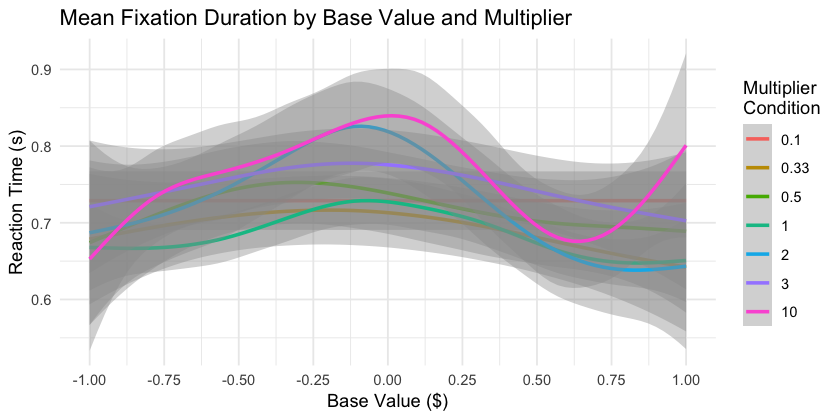

In [125]:
final_fix_plot(v310_long_tp)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


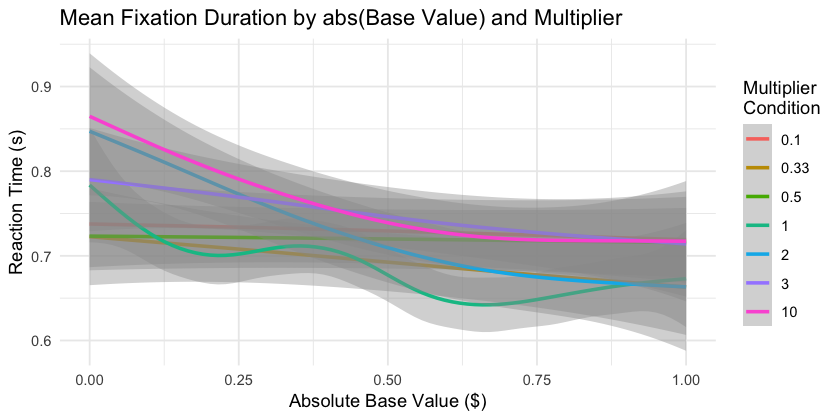

In [126]:
final_fix_plot_abs(v310_long_tp)

In [127]:
x = v310_long_tp %>%
        filter(which_fix == 3) %>%
        select(subject, trial, fix_rt, fix_stim_val_base, fix_stim_mult)

In [128]:
x$abs_base_val_3 = abs(x$fix_stim_val_base)
x$mult_3 = x$fix_stim_mult

In [129]:
#Test for SIG
v310_tp_3.lmer <- lmer (fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3|subject) + (1|subject), 
                        data = x,
                        control = lmerControl(optimizer ="Nelder_Mead")) # wasn't converging with standard optimizer BOBYQA
summary(v310_tp_3.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fix_rt ~ abs_base_val_3 * mult_3 + (0 + abs_base_val_3 | subject) +  
    (1 | subject)
   Data: x
Control: lmerControl(optimizer = "Nelder_Mead")

REML criterion at convergence: 8393.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2295 -0.5800 -0.0955  0.4235 11.4802 

Random effects:
 Groups    Name           Variance Std.Dev.
 subject   abs_base_val_3 0.008545 0.09244 
 subject.1 (Intercept)    0.061648 0.24829 
 Residual                 0.154597 0.39319 
Number of obs: 8454, groups:  subject, 28

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            7.453e-01  4.814e-02  2.836e+01  15.481 2.31e-15 ***
abs_base_val_3        -9.400e-02  2.532e-02  4.006e+01  -3.713 0.000623 ***
mult_3                 9.774e-03  2.949e-03  8.426e+03   3.314 0.000923 ***
abs_base_val_3:mult_3 -6.741e-03  5.005e-03  8.425e+03  -1.347

---
#### Comparisons
---

##### Table
---

In [130]:
tab_model(v301_3.lmer, v302_3.lmer, v310_notp_3.lmer, v310_tp_3.lmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Base Value', 'Multiplier', 'Base Value:Multiplier'),
          title="Final Fixation: Duration")

ERROR: Error in rsq.list[[i]][[2]]: subscript out of bounds


---
##### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


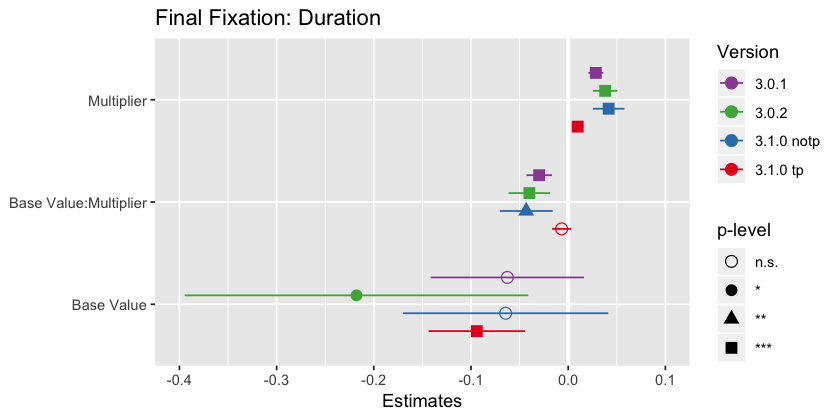

In [131]:
plot_models(v301_3.lmer, v302_3.lmer, v310_notp_3.lmer, v310_tp_3.lmer,
            show.p=TRUE,
            p.shape=TRUE,
            spacing=0.7,           
            axis.labels = c("Base Value", "Base Value:Multiplier", "Multiplier"),
            legend.title='Version',
            m.labels=c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="Final Fixation: Duration")  +  
ylim(-.4, .1) 


---
## Mult Difference
---

In [37]:
# Do we spend more time looking at the larger mult?
# Look at total time spent looking at stim as function of the weight difference

---
### V3.0.1
---

#### Create Fixation Columns
---

In [108]:
# Calculate 

# total left dwell time + base val left
left_fix_total_rt = v301_long %>%
    filter(fix_stim=='left') %>%
    group_by(subject, trial) %>%
    summarise(left_fix_total_rt = sum(fix_rt),
             left_base_val = mean(fix_stim_val_base))

# total right dwell time + base val right
right_fix_total_rt = v301_long %>%
    filter(fix_stim=='right') %>%
    group_by(subject, trial) %>%
    summarise(right_fix_total_rt = sum(fix_rt),
             right_base_val = mean(fix_stim_val_base))

In [109]:
# Add to trial data frame
v301 = merge(x = v301, y = left_fix_total_rt, by = c("subject", "trial"), all = TRUE)
v301 = merge(x = v301, y = right_fix_total_rt, by = c("subject", "trial"), all = TRUE)

In [110]:
# Replace NAs with 0 (in case they didn't look at one of the stim)
v301$left_fix_total_rt[is.na(v301$left_fix_total_rt)] <- 0.001
v301$right_fix_total_rt[is.na(v301$right_fix_total_rt)] <- 0.001

In [92]:
# Calculate the right mult pull (based on left)
v301$right_mult_pull = -1 * v301$left_mult_pull

In [98]:
# Calculate proportion of rt focussed left
v301$left_fix_bias = v301$left_fix_total_rt / (v301$left_fix_total_rt + v301$right_fix_total_rt)

In [111]:
# look at overall left fixation bias
v301 %>%
    summarise(mean_left_bias = mean(left_fix_bias))

mean_left_bias
1 0.5223272

In [112]:
head(v301, 3)

subject trial date             psychopy_version exp_version face_version
1 1       1     2019_Feb_06_1040 3.0.2            3.0.1       1           
2 1       3     2019_Feb_06_1040 3.0.2            3.0.1       1           
3 1       4     2019_Feb_06_1040 3.0.2            3.0.1       1           
  house_version left block rt    ⋯ outlier_rt_MAD version bin     bin_abs
1 1             face 0     1.933 ⋯ 1.93           v301    -7.7153 7.679  
2 1             face 0     1.933 ⋯ 1.93           v301    -0.8308 0.655  
3 1             face 0     1.550 ⋯ 1.55           v301     0.8437 0.905  
  right_mult_pull left_fix_bias left_fix_total_rt left_base_val
1 -7              0.6418979     0.717             -0.58        
2  0              0.7320372     0.866             -0.70        
3 -7              0.6343714     0.550              0.20        
  right_fix_total_rt right_base_val
1 0.400               0.06         
2 0.317               0.32         
3 0.317              -0.40

#### Model

In [114]:
v301_fix_bias.lmer <- lmer (left_fix_bias ~ left_base_val*right_base_val*left_mult_pull + (0 + left_mult_pull|subject) + (1|subject),
                data = v301)
summary(v301_fix_bias.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: left_fix_bias ~ left_base_val * right_base_val * left_mult_pull +  
    (0 + left_mult_pull | subject) + (1 | subject)
   Data: v301

REML criterion at convergence: -13053.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5148 -0.6399  0.0027  0.6557  5.8306 

Random effects:
 Groups    Name           Variance  Std.Dev.
 subject   left_mult_pull 2.326e-05 0.004823
 subject.1 (Intercept)    1.096e-02 0.104675
 Residual                 1.680e-02 0.129609
Number of obs: 10698, groups:  subject, 31

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  5.273e-01  1.885e-02  2.995e+01
left_base_val                                2.295e-03  2.155e-03  1.064e+04
right_base_val                              -4.302e-03  2.148e-03  1.064e+04
left_mult_pull                               5.233e-03  9.423e-04

---
### V3.0.2
---

In [115]:
# Calculate 

# total left dwell time + base val left
left_fix_total_rt = v302_long %>%
    filter(fix_stim=='left') %>%
    group_by(subject, trial) %>%
    summarise(left_fix_total_rt = sum(fix_rt),
             left_base_val = mean(fix_stim_val_base))

# total right dwell time + base val right
right_fix_total_rt = v302_long %>%
    filter(fix_stim=='right') %>%
    group_by(subject, trial) %>%
    summarise(right_fix_total_rt = sum(fix_rt),
             right_base_val = mean(fix_stim_val_base))

In [116]:
# Add to trial data frame
v302 = merge(x = v302, y = left_fix_total_rt, by = c("subject", "trial"), all = TRUE)
v302 = merge(x = v302, y = right_fix_total_rt, by = c("subject", "trial"), all = TRUE)

In [117]:
# Replace NAs with 0 (in case they didn't look at one of the stim)
v302$left_fix_total_rt[is.na(v302$left_fix_total_rt)] <- 0.001
v302$right_fix_total_rt[is.na(v302$right_fix_total_rt)] <- 0.001

In [118]:
# Calculate the right mult pull (based on left)
v302$right_mult_pull = -1 * v302$left_mult_pull

In [119]:
# Calculate proportion of rt focussed left
v302$left_fix_bias = v302$left_fix_total_rt / (v302$left_fix_total_rt + v302$right_fix_total_rt)

In [120]:
# look at overall left fixation bias
v302 %>%
    summarise(mean_left_bias = mean(left_fix_bias))

mean_left_bias
1 0.5433315

In [121]:
head(v302, 3)

subject trial date             psychopy_version exp_version face_version
1 41      0     2019_Feb_20_0900 3.0.2            3.0.2       0           
2 41      1     2019_Feb_20_0900 3.0.2            3.0.2       0           
3 41      2     2019_Feb_20_0900 3.0.2            3.0.2       0           
  house_version left block rt    ⋯ outlier_rt_MAD version bin     bin_abs
1 1             face 0     3.467 ⋯ 3.47           v302     0.6125 0.458  
2 1             face 0     2.050 ⋯ 2.05           v302    -1.5963 1.722  
3 1             face 0     3.867 ⋯ 3.87           v302    -0.3854 0.458  
  left_fix_total_rt left_base_val right_fix_total_rt right_base_val
1 1.100              0.32         0.767               0.74         
2 0.650             -0.66         0.717              -0.58         
3 2.233              0.26         0.800              -0.70         
  right_mult_pull left_fix_bias
1  0.0            0.5891805    
2 -1.5            0.4754938    
3  0.0            0.7362348

#### Model

In [123]:
v302_fix_bias.lmer <- lmer (left_fix_bias ~ left_base_val*right_base_val*left_mult_pull + (0 + left_mult_pull|subject) + (1|subject),
                data = v302)
summary(v302_fix_bias.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: left_fix_bias ~ left_base_val * right_base_val * left_mult_pull +  
    (0 + left_mult_pull | subject) + (1 | subject)
   Data: v302

REML criterion at convergence: -7517

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9241 -0.6551  0.0297  0.6705  3.4625 

Random effects:
 Groups    Name           Variance  Std.Dev.
 subject   left_mult_pull 3.361e-05 0.005798
 subject.1 (Intercept)    6.069e-03 0.077903
 Residual                 1.906e-02 0.138072
Number of obs: 6898, groups:  subject, 23

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  5.419e-01  1.634e-02  2.203e+01
left_base_val                                5.664e-03  2.857e-03  6.851e+03
right_base_val                              -8.722e-04  2.852e-03  6.848e+03
left_mult_pull                               8.421e-03  1.316e-03  2.

---
### V3.1.0 notp
---

In [124]:
# Calculate 

# total left dwell time + base val left
left_fix_total_rt = v310_long_notp %>%
    filter(fix_stim=='left') %>%
    group_by(subject, trial) %>%
    summarise(left_fix_total_rt = sum(fix_rt),
             left_base_val = mean(fix_stim_val_base))

# total right dwell time + base val right
right_fix_total_rt = v310_long_notp %>%
    filter(fix_stim=='right') %>%
    group_by(subject, trial) %>%
    summarise(right_fix_total_rt = sum(fix_rt),
             right_base_val = mean(fix_stim_val_base))

In [125]:
# Add to trial data frame
v310_notp = merge(x = v310_notp, y = left_fix_total_rt, by = c("subject", "trial"), all = TRUE)
v310_notp = merge(x = v310_notp, y = right_fix_total_rt, by = c("subject", "trial"), all = TRUE)

In [126]:
# Replace NAs with 0 (in case they didn't look at one of the stim)
v310_notp$left_fix_total_rt[is.na(v310_notp$left_fix_total_rt)] <- 0.001
v310_notp$right_fix_total_rt[is.na(v310_notp$right_fix_total_rt)] <- 0.001

In [127]:
# Calculate the right mult pull (based on left)
v310_notp$right_mult_pull = -1 * v310_notp$left_mult_pull

In [128]:
# Calculate proportion of rt focussed left
v310_notp$left_fix_bias = v310_notp$left_fix_total_rt / (v310_notp$left_fix_total_rt + v310_notp$right_fix_total_rt)

In [129]:
# look at overall left fixation bias
v310_notp %>%
    summarise(mean_left_bias = mean(left_fix_bias))

mean_left_bias
1 0.5532501

In [130]:
head(v302, 3)

subject trial date             psychopy_version exp_version face_version
1 41      0     2019_Feb_20_0900 3.0.2            3.0.2       0           
2 41      1     2019_Feb_20_0900 3.0.2            3.0.2       0           
3 41      2     2019_Feb_20_0900 3.0.2            3.0.2       0           
  house_version left block rt    ⋯ outlier_rt_MAD version bin     bin_abs
1 1             face 0     3.467 ⋯ 3.47           v302     0.6125 0.458  
2 1             face 0     2.050 ⋯ 2.05           v302    -1.5963 1.722  
3 1             face 0     3.867 ⋯ 3.87           v302    -0.3854 0.458  
  left_fix_total_rt left_base_val right_fix_total_rt right_base_val
1 1.100              0.32         0.767               0.74         
2 0.650             -0.66         0.717              -0.58         
3 2.233              0.26         0.800              -0.70         
  right_mult_pull left_fix_bias
1  0.0            0.5891805    
2 -1.5            0.4754938    
3  0.0            0.7362348

#### Model

In [131]:
v310_notp_fix_bias.lmer <- lmer (left_fix_bias ~ left_base_val*right_base_val*left_mult_pull + (0 + left_mult_pull|subject) + (1|subject),
                data = v310_notp)
summary(v310_notp_fix_bias.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: left_fix_bias ~ left_base_val * right_base_val * left_mult_pull +  
    (0 + left_mult_pull | subject) + (1 | subject)
   Data: v310_notp

REML criterion at convergence: -2617

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1379 -0.6486  0.0092  0.6568  3.3535 

Random effects:
 Groups    Name           Variance  Std.Dev.
 subject   left_mult_pull 2.821e-05 0.005312
 subject.1 (Intercept)    7.474e-03 0.086454
 Residual                 1.368e-02 0.116956
Number of obs: 1937, groups:  subject, 28

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  5.524e-01  1.657e-02  2.707e+01
left_base_val                                7.633e-03  4.592e-03  1.889e+03
right_base_val                              -6.258e-03  4.579e-03  1.895e+03
left_mult_pull                               5.839e-03  1.279e-0

---
### V3.1.0 tp
---

In [132]:
# Calculate 

# total left dwell time + base val left
left_fix_total_rt = v310_long_tp %>%
    filter(fix_stim=='left') %>%
    group_by(subject, trial) %>%
    summarise(left_fix_total_rt = sum(fix_rt),
             left_base_val = mean(fix_stim_val_base))

# total right dwell time + base val right
right_fix_total_rt = v310_long_tp %>%
    filter(fix_stim=='right') %>%
    group_by(subject, trial) %>%
    summarise(right_fix_total_rt = sum(fix_rt),
             right_base_val = mean(fix_stim_val_base))

In [133]:
# Add to trial data frame
v310_tp = merge(x = v310_tp, y = left_fix_total_rt, by = c("subject", "trial"), all = TRUE)
v310_tp = merge(x = v310_tp, y = right_fix_total_rt, by = c("subject", "trial"), all = TRUE)

In [134]:
# Replace NAs with 0 (in case they didn't look at one of the stim)
v310_tp$left_fix_total_rt[is.na(v310_tp$left_fix_total_rt)] <- 0.001
v310_tp$right_fix_total_rt[is.na(v310_tp$right_fix_total_rt)] <- 0.001

In [135]:
# Calculate the right mult pull (based on left)
v310_tp$right_mult_pull = -1 * v310_tp$left_mult_pull

In [136]:
# Calculate proportion of rt focussed left
v310_tp$left_fix_bias = v310_tp$left_fix_total_rt / (v310_tp$left_fix_total_rt + v310_tp$right_fix_total_rt)

In [138]:
# look at overall left fixation bias
v310_tp %>%
    summarise(mean_left_bias = mean(left_fix_bias))

mean_left_bias
1 0.5039787

In [139]:
head(v302, 3)

subject trial date             psychopy_version exp_version face_version
1 41      0     2019_Feb_20_0900 3.0.2            3.0.2       0           
2 41      1     2019_Feb_20_0900 3.0.2            3.0.2       0           
3 41      2     2019_Feb_20_0900 3.0.2            3.0.2       0           
  house_version left block rt    ⋯ outlier_rt_MAD version bin     bin_abs
1 1             face 0     3.467 ⋯ 3.47           v302     0.6125 0.458  
2 1             face 0     2.050 ⋯ 2.05           v302    -1.5963 1.722  
3 1             face 0     3.867 ⋯ 3.87           v302    -0.3854 0.458  
  left_fix_total_rt left_base_val right_fix_total_rt right_base_val
1 1.100              0.32         0.767               0.74         
2 0.650             -0.66         0.717              -0.58         
3 2.233              0.26         0.800              -0.70         
  right_mult_pull left_fix_bias
1  0.0            0.5891805    
2 -1.5            0.4754938    
3  0.0            0.7362348

#### Model

In [140]:
v310_tp_fix_bias.lmer <- lmer (left_fix_bias ~ left_base_val*right_base_val*left_mult_pull + (0 + left_mult_pull|subject) + (1|subject),
                data = v310_tp)
summary(v310_tp_fix_bias.lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: left_fix_bias ~ left_base_val * right_base_val * left_mult_pull +  
    (0 + left_mult_pull | subject) + (1 | subject)
   Data: v310_tp

REML criterion at convergence: -12724.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6235 -0.6424 -0.0268  0.6313  3.9013 

Random effects:
 Groups    Name           Variance  Std.Dev.
 subject   left_mult_pull 0.0000439 0.006626
 subject.1 (Intercept)    0.0038810 0.062297
 Residual                 0.0118158 0.108701
Number of obs: 8125, groups:  subject, 28

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  5.055e-01  1.184e-02  2.703e+01
left_base_val                                3.117e-03  2.067e-03  8.065e+03
right_base_val                               4.310e-04  2.075e-03  8.063e+03
left_mult_pull                               7.538e-03  1.309e-

---
### Comparisons
---

#### Table
---

In [141]:
tab_model(v301_fix_bias.lmer, v302_fix_bias.lmer, v310_notp_fix_bias.lmer, v310_tp_fix_bias.lmer, 
          show.aic = T, 
          show.ci = F,
          dv.labels = c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
          pred.labels= c('Intercept', 'Left Mult Pull'),
          title="First Fixation: Mutliplier Choice")

Length of `pred.labels` does not equal number of predictors, no labelling applied.


---
#### Plot
---

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


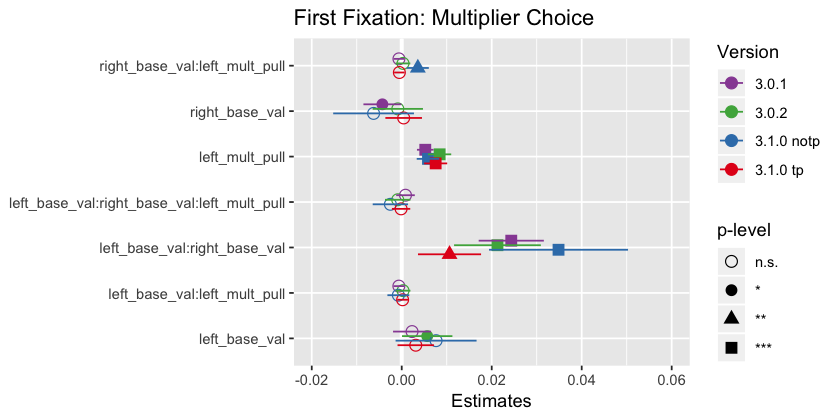

In [147]:
plot_models(v301_fix_bias.lmer, v302_fix_bias.lmer, v310_notp_fix_bias.lmer, v310_tp_fix_bias.lmer,
            show.p=TRUE,
            p.shape=TRUE,
            #axis.labels = c('Left Mult Pull'),
            legend.title='Version',
            m.labels=c('3.0.1', '3.0.2', '3.1.0 notp', '3.1.0 tp'),
            title="First Fixation: Multiplier Choice")  +  
ylim(-0.02, 0.06)


## Choice ~ Total Fix Time on Stim on BOUNDARY choices

# Mult Weights

---
## v1
---

In [224]:
rm(df_w)

In [225]:
# rename so glm syntax stays consistent
v1$face_base = v1$faceVal
v1$house_base = v1$houseVal
v1$house_mult = v1$mult1House
v1$face_mult = v1$mult2Face

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v1, select_columns = c('house_mult', 'face_mult'))

In [226]:
names(v1)

[1] "Trial"           "correct"         "faceVal"         "houseVal"       
 [5] "mult1House"      "mult2Face"       "summedVal"       "earnings"       
 [9] "imageList"       "flip"            "subject"         "origNumber"     
[13] "timings2"        "rt"              "imageSequence"   "acceptReject"   
[17] "valBin"          "valBinAmt"       "valBinCtr"       "choice"         
[21] "fixation_timing" "total_0_face"    "total_1_house"   "lastImage"      
[25] "finalEarnings"   "absDiff"         "swapAmount"      "swapAvg"        
[29] "logRT"           "accuracy"        "absSummedVal"    "multNum"        
[33] "difficulty"      "faceTotal"       "houseTotal"      "faceValBin"     
[37] "faceValBinAmt"   "faceValBinCtr"   "houseValBin"     "houseValBinAmt" 
[41] "houseValBinCtr"  "firstImage"      "firstVal"        "secondVal"      
[45] "firstMult"       "secondMult"      "multDif"         "1_fixation"     
[49] "2_fixation"      "3_fixation"      "4_fixation"      "5_fixation"     
[53] "6_fixation"      "7_fixation"      "8_fixation"      "9_fixation"     
[57] "10_fixation"     "11_fixation"     "12_fixation"     "13_fixation"    
[61] "version"         "bin"             "bin_abs"         "abs_base_val_1" 
[65] "mult_1"          "abs_base_val_2"  "mult_2"          "face_base"      
[69] "house_base"      "mult_house"      "face_mult"       "house_mult"

In [227]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,73:75] = df_w[,73:75] * df_w$house_base
df_w[,76:78] = df_w[,76:78] * df_w$face_base

In [228]:
head(df_w,3)

Trial correct faceVal houseVal mult1House mult2Face summedVal earnings
1 1     1       0.66     0.86    2          2          3.04     39.60   
2 2     0       0.38    -0.52    1          1         -0.14     39.46   
3 3     1       0.32    -0.68    1          3          0.28     39.74   
  imageList          flip ⋯ house_base mult_house face_mult house_mult
1 [1, 0, 1, 0, 1, 0] 2    ⋯  0.86      2          2         2         
2 [0, 1, 0]          2    ⋯ -0.52      1          1         1         
3 [0, 1, 0]          1    ⋯ -0.68      1          3         1         
  house_mult_2 house_mult_1 house_mult_3 face_mult_2 face_mult_1 face_mult_3
1 0.86          0.00        0            0.66        0.00        0.00       
2 0.00         -0.52        0            0.00        0.38        0.00       
3 0.00         -0.68        0            0.00        0.00        0.32

In [229]:
v1_weights.glmer <- glmer(choice ~ face_mult_1 + face_mult_2 + face_mult_3 +
                          house_mult_1 + house_mult_2 + house_mult_3 +
                          (0 + face_mult_1 + face_mult_2 + face_mult_3 + 
                           house_mult_1 + house_mult_2 + house_mult_3 |subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v1_weights.glmer)

boundary (singular) fit: see ?isSingular


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choice ~ face_mult_1 + face_mult_2 + face_mult_3 + house_mult_1 +  
    house_mult_2 + house_mult_3 + (0 + face_mult_1 + face_mult_2 +  
    face_mult_3 + house_mult_1 + house_mult_2 + house_mult_3 |  
    subject) + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  4928.6   5125.7  -2435.3   4870.6     6568 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-26.197  -0.406   0.009   0.395  79.271 

Random effects:
 Groups    Name         Variance Std.Dev. Corr                    
 subject   face_mult_1  0.5315   0.7290                           
           face_mult_2  2.7132   1.6472   0.88                    
           face_mult_3  8.0667   2.8402   0.91 0.92               
           house_mult_1 0.6810   0.8252   0.55 0.60 0.52          
           house_mult_2 3.7757  

---
## v2
---

In [246]:
rm(df_w)

In [247]:
# rename so glm syntax stays consistent
v2$face_base = v2$face_val_base
v2$house_base = v2$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v2, select_columns = c('house_mult', 'face_mult'))

In [248]:
names(v2)

[1] "choice"            "correct"           "earnings"         
  [4] "face_mult"         "face_val_base"     "first_image"      
  [7] "house_mult"        "house_val_base"    "image_list"       
 [10] "key_entry_list"    "last_image"        "num_fixations"    
 [13] "participant"       "round_num"         "rt"               
 [16] "rt_list"           "summed_val"        "trial"            
 [19] "face_val_total"    "house_val_total"   "timings"          
 [22] "image_sequence"    "fixation_timing"   "total_fix_face_0" 
 [25] "total_fix_house_1" "final_earnings"    "abs_diff"         
 [28] "fix_num"           "first_val"         "second_val"       
 [31] "first_mult"        "second_mult"       "1_fixation"       
 [34] "2_fixation"        "3_fixation"        "4_fixation"       
 [37] "5_fixation"        "6_fixation"        "7_fixation"       
 [40] "8_fixation"        "9_fixation"        "10_fixation"      
 [43] "11_fixation"       "12_fixation"       "13_fixation"      
 [46] "14_fixation"       "15_fixation"       "16_fixation"      
 [49] "17_fixation"       "18_fixation"       "19_fixation"      
 [52] "20_fixation"       "21_fixation"       "22_fixation"      
 [55] "23_fixation"       "24_fixation"       "25_fixation"      
 [58] "26_fixation"       "27_fixation"       "28_fixation"      
 [61] "29_fixation"       "30_fixation"       "31_fixation"      
 [64] "32_fixation"       "33_fixation"       "34_fixation"      
 [67] "35_fixation"       "36_fixation"       "37_fixation"      
 [70] "38_fixation"       "39_fixation"       "40_fixation"      
 [73] "41_fixation"       "42_fixation"       "43_fixation"      
 [76] "44_fixation"       "45_fixation"       "46_fixation"      
 [79] "47_fixation"       "48_fixation"       "49_fixation"      
 [82] "50_fixation"       "51_fixation"       "52_fixation"      
 [85] "53_fixation"       "summedVal"         "subject"          
 [88] "absSummedVal"      "swapAmount"        "firstMult"        
 [91] "firstVal"          "secondMult"        "secondVal"        
 [94] "faceTotal"         "houseTotal"        "total_0_face"     
 [97] "total_1_house"     "version"           "bin"              
[100] "bin_abs"           "abs_base_val_1"    "mult_1"           
[103] "abs_base_val_2"    "mult_2"            "face_base"        
[106] "house_base"

In [249]:
# apply base value to the dummy code
# 107-112 = house
# 113-118 = face
df_w[,107:112] = df_w[,107:112] * df_w$house_base
df_w[,113:118] = df_w[,113:118] * df_w$face_base

In [250]:
head(df_w,3)

choice correct earnings face_mult face_val_base first_image house_mult
1 0      1       -10.600  2.0       -0.38         1           0.5       
2 1      1       -10.306  0.5        0.50         0           0.1       
3 0      1       -10.646  1.0       -0.40         0           1.0       
  house_val_base image_list   key_entry_list                   ⋯ house_mult_1
1 -0.72          [1, 0, 1]    ['space', 'space', 'j']          ⋯  0.00       
2  0.44          [0, 1]       ['space', 'f']                   ⋯  0.00       
3 -0.78          [0, 1, 0, 1] ['space', 'space', 'space', 'j'] ⋯ -0.78       
  house_mult_2 house_mult_3 house_mult_10 face_mult_2 face_mult_0.5 face_mult_1
1 0            0            0             -0.38       0.0            0.0       
2 0            0            0              0.00       0.5            0.0       
3 0            0            0              0.00       0.0           -0.4       
  face_mult_3 face_mult_0.1 face_mult_10
1 0           0             0           
2 0           0             0           
3 0           0             0

In [251]:
v2_weights.glmer <- glmer(choice ~ face_mult_0.1 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
#                           (0 + face_mult_0.1 + face_mult_0.5 + face_mult_1 + 
#                            face_mult_2 + face_mult_3 + face_mult_10 +
#                            house_mult_0.1 + house_mult_0.5 + house_mult_1 + 
#                            house_mult_2 + house_mult_3 + house_mult_10|subject) + 
                          (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v2_weights.glmer)


Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choice ~ face_mult_0.1 + face_mult_0.5 + face_mult_1 + face_mult_2 +  
    face_mult_3 + face_mult_10 + house_mult_0.1 + house_mult_0.5 +  
    house_mult_1 + house_mult_2 + house_mult_3 + house_mult_10 +  
    (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  8134.2   8237.3  -4053.1   8106.2    11657 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-532.35   -0.36    0.00    0.36   40.12 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.2118   0.4602  
Number of obs: 11671, groups:  subject, 31

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.007424   0.087286  -0.085    0.932    
face_mult_0.1   0.867459   0.118900   7.296 2.97e-13 ***
face_mult_0.5   1.758765   0.134141  13.111  < 2e-16 ***
face_mul

---
## v301
---

In [253]:
rm(df_w)

In [254]:
# rename so glm syntax stays consistent
v301$face_base = v301$face_val_base
v301$house_base = v301$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v301, select_columns = c('house_mult', 'face_mult'))

In [255]:
names(df_w)

[1] "date"                  "psychopy_version"      "exp_version"          
 [4] "face_version"          "house_version"         "left"                 
 [7] "subject"               "block"                 "trial"                
[10] "rt"                    "response"              "correct"              
[13] "summed_val_total"      "face_image"            "face_val_base"        
[16] "face_mult"             "face_val_total"        "house_image"          
[19] "house_val_base"        "house_mult"            "house_val_total"      
[22] "fix_num"               "fix_rt"                "fix_stim"             
[25] "earnings"              "total_fix_num"         "total_weights_fix"    
[28] "total_stim_fix"        "which_fix"             "fix_stim_val_base"    
[31] "fix_stim_mult"         "left_mult"             "right_mult"           
[34] "left_mult_pull"        "outlier_accuracy_pVal" "outlier_accuracy_MAD" 
[37] "outlier_rt_pVal"       "outlier_rt_MAD"        "version"              
[40] "bin"                   "bin_abs"               "face_base"            
[43] "house_base"            "house_mult_3"          "house_mult_2"         
[46] "house_mult_1"          "house_mult_10"         "house_mult_0.5"       
[49] "house_mult_0.33"       "house_mult_0.1"        "face_mult_10"         
[52] "face_mult_2"           "face_mult_1"           "face_mult_3"          
[55] "face_mult_0.5"         "face_mult_0.33"        "face_mult_0.1"

In [256]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,44:50] = df_w[,44:50] * df_w$house_base
df_w[,51:57] = df_w[,51:57] * df_w$face_base

In [257]:
head(df_w,3)

date             psychopy_version exp_version face_version house_version left
1 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
2 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
3 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
  subject block trial rt    ⋯ house_mult_0.5 house_mult_0.33 house_mult_0.1
1 1       0     1     1.933 ⋯ 0              0               0             
2 1       0     3     1.933 ⋯ 0              0               0             
3 1       0     4     1.550 ⋯ 0              0               0             
  face_mult_10 face_mult_2 face_mult_1 face_mult_3 face_mult_0.5 face_mult_0.33
1 -0.58         0.0        0           0           0             0             
2  0.00        -0.7        0           0           0             0             
3  0.20         0.0        0           0           0             0             
  face_mult_0.1
1 0            
2 0            
3 0

In [258]:
v301_weights.glmer <- glmer(response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
#                           (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
#                            face_mult_2 + face_mult_3 + face_mult_10 +
#                            house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
#                            house_mult_2 + house_mult_3 + house_mult_10|subject) + 
                            (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v301_weights.glmer)


Correlation matrix not shown by default, as p = 15 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 +  
    face_mult_2 + face_mult_3 + face_mult_10 + house_mult_0.1 +  
    house_mult_0.33 + house_mult_0.5 + house_mult_1 + house_mult_2 +  
    house_mult_3 + house_mult_10 + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  8269.3   8385.9  -4118.6   8237.3    10827 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-173.210   -0.421    0.012    0.416   51.041 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.1647   0.4059  
Number of obs: 10843, groups:  subject, 31

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.01534    0.07859  -0.195    0.845    
face_mult_0.1    1.38697    0.13711  10.116  < 2e-16 ***
face_mult_0.33   

---
## v302
---

In [259]:
rm(df_w)

In [260]:
# rename so glm syntax stays consistent
v302$face_base = v302$face_val_base
v302$house_base = v302$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v302, select_columns = c('house_mult', 'face_mult'))

In [261]:
names(df_w)

[1] "date"                  "psychopy_version"      "exp_version"          
 [4] "face_version"          "house_version"         "left"                 
 [7] "subject"               "block"                 "trial"                
[10] "rt"                    "response"              "correct"              
[13] "summed_val_total"      "face_image"            "face_val_base"        
[16] "face_mult"             "face_val_total"        "house_image"          
[19] "house_val_base"        "house_mult"            "house_val_total"      
[22] "fix_num"               "fix_rt"                "fix_stim"             
[25] "accuracy"              "payout"                "total_fix_num"        
[28] "total_weights_fix"     "total_stim_fix"        "which_fix"            
[31] "fix_stim_val_base"     "fix_stim_mult"         "left_mult"            
[34] "right_mult"            "left_mult_pull"        "outlier_accuracy_pVal"
[37] "outlier_accuracy_MAD"  "outlier_rt_pVal"       "outlier_rt_MAD"       
[40] "version"               "bin"                   "bin_abs"              
[43] "face_base"             "house_base"            "house_mult_0.5"       
[46] "house_mult_1"          "house_mult_0.1"        "house_mult_2"         
[49] "house_mult_10"         "house_mult_3"          "house_mult_0.33"      
[52] "face_mult_0.5"         "face_mult_2"           "face_mult_1"          
[55] "face_mult_0.1"         "face_mult_0.33"        "face_mult_10"         
[58] "face_mult_3"

In [262]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,45:51] = df_w[,45:51] * df_w$house_base
df_w[,52:58] = df_w[,52:58] * df_w$face_base

In [263]:
head(df_w,3)

date             psychopy_version exp_version face_version house_version left
1 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
2 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
3 2019_Feb_20_0900 3.0.2            3.0.2       0            1             face
  subject block trial rt    ⋯ house_mult_10 house_mult_3 house_mult_0.33
1 41      0     0     3.467 ⋯ 0             0            0              
2 41      0     1     2.050 ⋯ 0             0            0              
3 41      0     2     3.867 ⋯ 0             0            0              
  face_mult_0.5 face_mult_2 face_mult_1 face_mult_0.1 face_mult_0.33
1 0.32           0.00       0.00        0             0             
2 0.00          -0.66       0.00        0             0             
3 0.00           0.00       0.26        0             0             
  face_mult_10 face_mult_3
1 0            0          
2 0            0          
3 0            0

In [265]:
v302_weights.glmer <- glmer(response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
#                           (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
#                            face_mult_2 + face_mult_3 + face_mult_10 +
#                            house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
#                            house_mult_2 + house_mult_3 + house_mult_10|subject) + 
                            (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v302_weights.glmer)


Correlation matrix not shown by default, as p = 15 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 +  
    face_mult_2 + face_mult_3 + face_mult_10 + house_mult_0.1 +  
    house_mult_0.33 + house_mult_0.5 + house_mult_1 + house_mult_2 +  
    house_mult_3 + house_mult_10 + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  5204.9   5315.0  -2586.4   5172.9     7191 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-38.021  -0.388  -0.016   0.386 123.485 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.1259   0.3548  
Number of obs: 7207, groups:  subject, 23

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.08858    0.08226  -1.077    0.282    
face_mult_0.1    1.05617    0.17168   6.152 7.66e-10 ***
face_mult_0.33   1.70185    

---
## v310 notp
---

In [272]:
rm(df_w)

In [273]:
# rename so glm syntax stays consistent
v310_notp$face_base = v310_notp$face_val_base
v310_notp$house_base = v310_notp$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v310_notp, select_columns = c('house_mult', 'face_mult'))

In [274]:
names(df_w)

[1] "date"                  "psychopy_version"      "exp_version"          
 [4] "face_version"          "house_version"         "left"                 
 [7] "subject"               "block"                 "trial"                
[10] "rt"                    "response"              "correct"              
[13] "summed_val_total"      "face_image"            "face_val_base"        
[16] "face_mult"             "face_val_total"        "house_image"          
[19] "house_val_base"        "house_mult"            "house_val_total"      
[22] "fix_num"               "fix_rt"                "fix_stim"             
[25] "fix_num_total"         "accuracy"              "payout"               
[28] "condition"             "tp_rt"                 "total_fix_num"        
[31] "total_weights_fix"     "total_stim_fix"        "which_fix"            
[34] "fix_stim_val_base"     "fix_stim_mult"         "left_mult"            
[37] "right_mult"            "left_mult_pull"        "outlier_accuracy_pVal"
[40] "outlier_accuracy_MAD"  "outlier_rt_pVal"       "outlier_rt_MAD"       
[43] "version"               "bin"                   "bin_abs"              
[46] "face_base"             "house_base"            "house_mult_0.33"      
[49] "house_mult_0.1"        "house_mult_1"          "house_mult_10"        
[52] "house_mult_0.5"        "house_mult_3"          "house_mult_2"         
[55] "face_mult_0.33"        "face_mult_10"          "face_mult_1"          
[58] "face_mult_2"           "face_mult_0.5"         "face_mult_0.1"        
[61] "face_mult_3"

In [275]:
# apply base value to the dummy code

df_w[,48:54] = df_w[,48:54] * df_w$house_base
df_w[,55:61] = df_w[,55:61] * df_w$face_base

In [276]:
head(df_w,3)

date             psychopy_version exp_version face_version house_version
1 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
2 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
3 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
  left  subject block trial rt    ⋯ house_mult_0.5 house_mult_3 house_mult_2
1 house 96      0     0     7.283 ⋯ 0              0            0           
2 house 96      0     1     4.150 ⋯ 0              0            0           
3 house 96      0     4     6.733 ⋯ 0              0            0           
  face_mult_0.33 face_mult_10 face_mult_1 face_mult_2 face_mult_0.5
1 -0.78          0.00          0.0        0           0            
2  0.00          0.56          0.0        0           0            
3  0.00          0.00         -0.8        0           0            
  face_mult_0.1 face_mult_3
1 0             0          
2 0             0          
3 0             0

In [277]:
v310_notp_weights.glmer <- glmer(response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
#                           (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
#                            face_mult_2 + face_mult_3 + face_mult_10 +
#                            house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
#                            house_mult_2 + house_mult_3 + house_mult_10|subject) + 
                                 (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_notp_weights.glmer)


Correlation matrix not shown by default, as p = 15 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 +  
    face_mult_2 + face_mult_3 + face_mult_10 + house_mult_0.1 +  
    house_mult_0.33 + house_mult_0.5 + house_mult_1 + house_mult_2 +  
    house_mult_3 + house_mult_10 + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1185.9   1275.6   -577.0   1153.9     1986 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-34.701  -0.258  -0.018   0.254  38.085 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.4337   0.6586  
Number of obs: 2002, groups:  subject, 28

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -0.09539    0.14673  -0.650 0.515637    
face_mult_0.1    2.05508    0.37777   5.440 5.33e-08 ***
face_mult_0.33   1.53395    

---
## v310 tp
---

In [291]:
rm(df_w)

In [292]:
# rename so glm syntax stays consistent
v310_tp$face_base = v310_tp$face_val_base
v310_tp$house_base = v310_tp$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v310_tp, select_columns = c('house_mult', 'face_mult'))

In [293]:
names(df_w)

[1] "date"                  "psychopy_version"      "exp_version"          
 [4] "face_version"          "house_version"         "left"                 
 [7] "subject"               "block"                 "trial"                
[10] "rt"                    "response"              "correct"              
[13] "summed_val_total"      "face_image"            "face_val_base"        
[16] "face_mult"             "face_val_total"        "house_image"          
[19] "house_val_base"        "house_mult"            "house_val_total"      
[22] "fix_num"               "fix_rt"                "fix_stim"             
[25] "fix_num_total"         "accuracy"              "payout"               
[28] "condition"             "tp_rt"                 "total_fix_num"        
[31] "total_weights_fix"     "total_stim_fix"        "which_fix"            
[34] "fix_stim_val_base"     "fix_stim_mult"         "left_mult"            
[37] "right_mult"            "left_mult_pull"        "outlier_accuracy_pVal"
[40] "outlier_accuracy_MAD"  "outlier_rt_pVal"       "outlier_rt_MAD"       
[43] "version"               "bin"                   "bin_abs"              
[46] "face_base"             "house_base"            "house_mult_3"         
[49] "house_mult_1"          "house_mult_2"          "house_mult_0.1"       
[52] "house_mult_0.5"        "house_mult_10"         "house_mult_0.33"      
[55] "face_mult_3"           "face_mult_1"           "face_mult_0.1"        
[58] "face_mult_0.5"         "face_mult_10"          "face_mult_2"          
[61] "face_mult_0.33"

In [294]:
# apply base value to the dummy code

df_w[,48:54] = df_w[,48:54] * df_w$house_base
df_w[,55:61] = df_w[,55:61] * df_w$face_base

# remove no response
df_w = filter(df_w, response<2)

In [295]:
head(df_w,3)

date             psychopy_version exp_version face_version house_version
1 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
2 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
3 2019_Mar_14_1401 3.0.2            3.1.0       0            0            
  left  subject block trial rt    ⋯ house_mult_0.5 house_mult_10
1 house 96      1     101   3.250 ⋯ 0              0            
2 house 96      1     102   1.583 ⋯ 0              0            
3 house 96      1     103   2.933 ⋯ 0              0            
  house_mult_0.33 face_mult_3 face_mult_1 face_mult_0.1 face_mult_0.5
1 0               0.16        0.00         0.00         0            
2 0               0.00        0.72         0.00         0            
3 0               0.00        0.00        -0.58         0            
  face_mult_10 face_mult_2 face_mult_0.33
1 0            0           0             
2 0            0           0             
3 0            0           0

In [296]:
table(df_w$response)


   0    1 
4171 4258 

In [297]:
v310_tp_weights.glmer <- glmer(response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
#                           (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
#                            face_mult_2 + face_mult_3 + face_mult_10 +
#                            house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
#                            house_mult_2 + house_mult_3 + house_mult_10|subject) + 
                               (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_tp_weights.glmer)


Correlation matrix not shown by default, as p = 15 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 +  
    face_mult_2 + face_mult_3 + face_mult_10 + house_mult_0.1 +  
    house_mult_0.33 + house_mult_0.5 + house_mult_1 + house_mult_2 +  
    house_mult_3 + house_mult_10 + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  6150.7   6263.3  -3059.4   6118.7     8413 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-274.612   -0.378    0.016    0.385   73.410 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.1162   0.3408  
Number of obs: 8429, groups:  subject, 28

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.03934    0.07199   0.546    0.585    
face_mult_0.1    1.40418    0.15878   8.843  < 2e-16 ***
face_mult_0.33   1

In [301]:
sjplot(v310_tp_weights.glmer)

ERROR: Error: `data` must be a data frame.


---
# Choice ~ Attention & Value

---
## v1
---

In [307]:
names(v1)

[1] "Trial"           "correct"         "faceVal"         "houseVal"       
 [5] "mult1House"      "mult2Face"       "summedVal"       "earnings"       
 [9] "imageList"       "flip"            "subject"         "origNumber"     
[13] "timings2"        "rt"              "imageSequence"   "acceptReject"   
[17] "valBin"          "valBinAmt"       "valBinCtr"       "choice"         
[21] "fixation_timing" "total_0_face"    "total_1_house"   "lastImage"      
[25] "finalEarnings"   "absDiff"         "swapAmount"      "swapAvg"        
[29] "logRT"           "accuracy"        "absSummedVal"    "multNum"        
[33] "difficulty"      "faceTotal"       "houseTotal"      "faceValBin"     
[37] "faceValBinAmt"   "faceValBinCtr"   "houseValBin"     "houseValBinAmt" 
[41] "houseValBinCtr"  "firstImage"      "firstVal"        "secondVal"      
[45] "firstMult"       "secondMult"      "multDif"         "1_fixation"     
[49] "2_fixation"      "3_fixation"      "4_fixation"      "5_fixation"     
[53] "6_fixation"      "7_fixation"      "8_fixation"      "9_fixation"     
[57] "10_fixation"     "11_fixation"     "12_fixation"     "13_fixation"    
[61] "version"         "bin"             "bin_abs"         "abs_base_val_1" 
[65] "mult_1"          "abs_base_val_2"  "mult_2"          "face_base"      
[69] "house_base"      "mult_house"      "face_mult"       "house_mult"

In [ ]:
v1$face_dwell_total
v1$house_dwell_total

In [227]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,73:75] = df_w[,73:75] * df_w$house_base
df_w[,76:78] = df_w[,76:78] * df_w$face_base

In [228]:
head(df_w,3)

Trial correct faceVal houseVal mult1House mult2Face summedVal earnings
1 1     1       0.66     0.86    2          2          3.04     39.60   
2 2     0       0.38    -0.52    1          1         -0.14     39.46   
3 3     1       0.32    -0.68    1          3          0.28     39.74   
  imageList          flip ⋯ house_base mult_house face_mult house_mult
1 [1, 0, 1, 0, 1, 0] 2    ⋯  0.86      2          2         2         
2 [0, 1, 0]          2    ⋯ -0.52      1          1         1         
3 [0, 1, 0]          1    ⋯ -0.68      1          3         1         
  house_mult_2 house_mult_1 house_mult_3 face_mult_2 face_mult_1 face_mult_3
1 0.86          0.00        0            0.66        0.00        0.00       
2 0.00         -0.52        0            0.00        0.38        0.00       
3 0.00         -0.68        0            0.00        0.00        0.32

In [229]:
v1_weights.glmer <- glmer(choice ~ face_mult_1 + face_mult_2 + face_mult_3 +
                          house_mult_1 + house_mult_2 + house_mult_3 +
                          (0 + face_mult_1 + face_mult_2 + face_mult_3 + 
                           house_mult_1 + house_mult_2 + house_mult_3 |subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v1_weights.glmer)

boundary (singular) fit: see ?isSingular


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: choice ~ face_mult_1 + face_mult_2 + face_mult_3 + house_mult_1 +  
    house_mult_2 + house_mult_3 + (0 + face_mult_1 + face_mult_2 +  
    face_mult_3 + house_mult_1 + house_mult_2 + house_mult_3 |  
    subject) + (1 | subject)
   Data: df_w
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  4928.6   5125.7  -2435.3   4870.6     6568 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-26.197  -0.406   0.009   0.395  79.271 

Random effects:
 Groups    Name         Variance Std.Dev. Corr                    
 subject   face_mult_1  0.5315   0.7290                           
           face_mult_2  2.7132   1.6472   0.88                    
           face_mult_3  8.0667   2.8402   0.91 0.92               
           house_mult_1 0.6810   0.8252   0.55 0.60 0.52          
           house_mult_2 3.7757  

---
## v2
---

In [230]:
rm(df_w)

In [231]:
# rename so glm syntax stays consistent
v2$face_base = v2$face_val_base
v2$house_base = v2$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v2, select_columns = c('house_mult', 'face_mult'))

In [232]:
names(v2)

[1] "choice"            "correct"           "earnings"         
  [4] "face_mult"         "face_val_base"     "first_image"      
  [7] "house_mult"        "house_val_base"    "image_list"       
 [10] "key_entry_list"    "last_image"        "num_fixations"    
 [13] "participant"       "round_num"         "rt"               
 [16] "rt_list"           "summed_val"        "trial"            
 [19] "face_val_total"    "house_val_total"   "timings"          
 [22] "image_sequence"    "fixation_timing"   "total_fix_face_0" 
 [25] "total_fix_house_1" "final_earnings"    "abs_diff"         
 [28] "fix_num"           "first_val"         "second_val"       
 [31] "first_mult"        "second_mult"       "1_fixation"       
 [34] "2_fixation"        "3_fixation"        "4_fixation"       
 [37] "5_fixation"        "6_fixation"        "7_fixation"       
 [40] "8_fixation"        "9_fixation"        "10_fixation"      
 [43] "11_fixation"       "12_fixation"       "13_fixation"      
 [46] "14_fixation"       "15_fixation"       "16_fixation"      
 [49] "17_fixation"       "18_fixation"       "19_fixation"      
 [52] "20_fixation"       "21_fixation"       "22_fixation"      
 [55] "23_fixation"       "24_fixation"       "25_fixation"      
 [58] "26_fixation"       "27_fixation"       "28_fixation"      
 [61] "29_fixation"       "30_fixation"       "31_fixation"      
 [64] "32_fixation"       "33_fixation"       "34_fixation"      
 [67] "35_fixation"       "36_fixation"       "37_fixation"      
 [70] "38_fixation"       "39_fixation"       "40_fixation"      
 [73] "41_fixation"       "42_fixation"       "43_fixation"      
 [76] "44_fixation"       "45_fixation"       "46_fixation"      
 [79] "47_fixation"       "48_fixation"       "49_fixation"      
 [82] "50_fixation"       "51_fixation"       "52_fixation"      
 [85] "53_fixation"       "summedVal"         "subject"          
 [88] "absSummedVal"      "swapAmount"        "firstMult"        
 [91] "firstVal"          "secondMult"        "secondVal"        
 [94] "faceTotal"         "houseTotal"        "total_0_face"     
 [97] "total_1_house"     "version"           "bin"              
[100] "bin_abs"           "abs_base_val_1"    "mult_1"           
[103] "abs_base_val_2"    "mult_2"            "face_base"        
[106] "house_base"

In [233]:
# apply base value to the dummy code
# 107-112 = house
# 113-118 = face
df_w[,107:112] = df_w[,107:112] * df_w$house_base
df_w[,113:118] = df_w[,113:118] * df_w$face_base

In [234]:
head(df_w,3)

choice correct earnings face_mult face_val_base first_image house_mult
1 0      1       -10.600  2.0       -0.38         1           0.5       
2 1      1       -10.306  0.5        0.50         0           0.1       
3 0      1       -10.646  1.0       -0.40         0           1.0       
  house_val_base image_list   key_entry_list                   ⋯ house_mult_1
1 -0.72          [1, 0, 1]    ['space', 'space', 'j']          ⋯  0.00       
2  0.44          [0, 1]       ['space', 'f']                   ⋯  0.00       
3 -0.78          [0, 1, 0, 1] ['space', 'space', 'space', 'j'] ⋯ -0.78       
  house_mult_2 house_mult_3 house_mult_10 face_mult_2 face_mult_0.5 face_mult_1
1 0            0            0             -0.38       0.0            0.0       
2 0            0            0              0.00       0.5            0.0       
3 0            0            0              0.00       0.0           -0.4       
  face_mult_3 face_mult_0.1 face_mult_10
1 0           0             0           
2 0           0             0           
3 0           0             0

In [235]:
v2_weights.glmer <- glmer(choice ~ face_mult_0.1 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
                          (0 + face_mult_0.1 + face_mult_0.5 + face_mult_1 + 
                           face_mult_2 + face_mult_3 + face_mult_10 +
                           house_mult_0.1 + house_mult_0.5 + house_mult_1 + 
                           house_mult_2 + house_mult_3 + house_mult_10|subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v2_weights.glmer)

Warning message in commonArgs(par, fn, control, environment()):
“maxfun < 10 * length(par)^2 is not recommended.”Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
“convergence code 1 from bobyqa: bobyqa -- maximum number of function evaluations exceeded”Warning message in commonArgs(par, fn, control, environment()):
“maxfun < 10 * length(par)^2 is not recommended.”

---
## v301
---

In [236]:
rm(df_w)

In [237]:
# rename so glm syntax stays consistent
v301$face_base = v301$face_val_base
v301$house_base = v301$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v301, select_columns = c('house_mult', 'face_mult'))

In [238]:
names(df_w)

[1] "date"                  "psychopy_version"      "exp_version"          
 [4] "face_version"          "house_version"         "left"                 
 [7] "subject"               "block"                 "trial"                
[10] "rt"                    "response"              "correct"              
[13] "summed_val_total"      "face_image"            "face_val_base"        
[16] "face_mult"             "face_val_total"        "house_image"          
[19] "house_val_base"        "house_mult"            "house_val_total"      
[22] "fix_num"               "fix_rt"                "fix_stim"             
[25] "earnings"              "total_fix_num"         "total_weights_fix"    
[28] "total_stim_fix"        "which_fix"             "fix_stim_val_base"    
[31] "fix_stim_mult"         "left_mult"             "right_mult"           
[34] "left_mult_pull"        "outlier_accuracy_pVal" "outlier_accuracy_MAD" 
[37] "outlier_rt_pVal"       "outlier_rt_MAD"        "version"              
[40] "bin"                   "bin_abs"               "face_base"            
[43] "house_base"            "house_mult_3"          "house_mult_2"         
[46] "house_mult_1"          "house_mult_10"         "house_mult_0.5"       
[49] "house_mult_0.33"       "house_mult_0.1"        "face_mult_10"         
[52] "face_mult_2"           "face_mult_1"           "face_mult_3"          
[55] "face_mult_0.5"         "face_mult_0.33"        "face_mult_0.1"

In [239]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,44:50] = df_w[,44:50] * df_w$house_base
df_w[,51:57] = df_w[,51:57] * df_w$face_base

In [240]:
head(df_w,3)

date             psychopy_version exp_version face_version house_version left
1 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
2 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
3 2019_Feb_06_1040 3.0.2            3.0.1       1            1             face
  subject block trial rt    ⋯ house_mult_0.5 house_mult_0.33 house_mult_0.1
1 1       0     1     1.933 ⋯ 0              0               0             
2 1       0     3     1.933 ⋯ 0              0               0             
3 1       0     4     1.550 ⋯ 0              0               0             
  face_mult_10 face_mult_2 face_mult_1 face_mult_3 face_mult_0.5 face_mult_0.33
1 -0.58         0.0        0           0           0             0             
2  0.00        -0.7        0           0           0             0             
3  0.20         0.0        0           0           0             0             
  face_mult_0.1
1 0            
2 0            
3 0

In [ ]:
v301_weights.glmer <- glmer(response ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
                          (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                           face_mult_2 + face_mult_3 + face_mult_10 +
                           house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                           house_mult_2 + house_mult_3 + house_mult_10|subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "Nelder_Mead"))#,
                    #nAGQ = 10)

summary(v301_weights.glmer)

---
## v302
---

In [ ]:
rm(df_w)

In [ ]:
# rename so glm syntax stays consistent
v302$face_base = v302$face_val_base
v302$house_base = v302$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v302, select_columns = c('house_mult', 'face_mult'))

In [ ]:
names(df_w)

In [ ]:
# apply base value to the dummy code
# 73-75 = house
# 76-78 = face
df_w[,45:51] = df_w[,45:51] * df_w$house_base
df_w[,52:58] = df_w[,52:58] * df_w$face_base

In [ ]:
head(df_w,3)

In [ ]:
v302_weights.glmer <- glmer(choice ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
                          (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                           face_mult_2 + face_mult_3 + face_mult_10 +
                           house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                           house_mult_2 + house_mult_3 + house_mult_10|subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v302_weights.glmer)

---
## v310 notp
---

In [ ]:
rm(df_w)

In [ ]:
# rename so glm syntax stays consistent
v310_notp$face_base = v310_notp$face_val_base
v310_notp$house_base = v310_notp$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v310_notp, select_columns = c('house_mult', 'face_mult'))

In [ ]:
names(df_w)

In [ ]:
# apply base value to the dummy code

df_w[,48:54] = df_w[,48:54] * df_w$house_base
df_w[,55:61] = df_w[,55:61] * df_w$face_base

In [ ]:
head(df_w,3)

In [ ]:
v310_notp_weights.glmer <- glmer(choice ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
                          (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                           face_mult_2 + face_mult_3 + face_mult_10 +
                           house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                           house_mult_2 + house_mult_3 + house_mult_10|subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_notp_weights.glmer)

---
## v310 tp
---

In [ ]:
rm(df_w)

In [ ]:
# rename so glm syntax stays consistent
v310_tp$face_base = v310_tp$face_val_base
v310_tp$house_base = v310_tp$house_val_base

# create dummies for multiplier columns
df_w = fastDummies::dummy_cols(v310_tp, select_columns = c('house_mult', 'face_mult'))

In [ ]:
names(df_w)

In [ ]:
# apply base value to the dummy code

df_w[,48:54] = df_w[,48:54] * df_w$house_base
df_w[,55:61] = df_w[,55:61] * df_w$face_base

In [ ]:
head(df_w,3)

In [ ]:
v310_tp_weights.glmer <- glmer(choice ~ face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                          face_mult_2 + face_mult_3 + face_mult_10 +
                          house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                          house_mult_2 + house_mult_3 + house_mult_10 +
                          (0 + face_mult_0.1 + face_mult_0.33 + face_mult_0.5 + face_mult_1 + 
                           face_mult_2 + face_mult_3 + face_mult_10 +
                           house_mult_0.1 + house_mult_0.33 + house_mult_0.5 + house_mult_1 + 
                           house_mult_2 + house_mult_3 + house_mult_10|subject) + (1|subject), 
                    data = df_w, 
                    family = binomial, 
                    control = glmerControl(optimizer = "bobyqa"))#,
                    #nAGQ = 10)

summary(v310_tp_weights.glmer)

In [ ]:
# 